* The **Amazon Sales Dataset** has 1K+ Amazon product ratings and reviews based on their details listed on the official website of Amazon.
* This dataset contains comprehensive information about Amazon products, ratings, and reviews, reflecting customer feedback and assessments. It serves as a representation of customer sentiment and can be analyzed to derive insights about products and brands.
* The dataset consists of 1465 rows and 16 columns.
* There are missing values present in the `ratings` and `rating_count` columns:
  * Rating column: 0.068259% missing values.
  * Rating count column: 0.136519% missing values.
* There are no duplicates in the dataset.

#### Potential Use Cases of the Dataset:
1. **Sentiment Analysis:** Understand customer sentiment towards products and analyze reviews for positive, negative, or neutral sentiment to help identify strengths and weaknesses.
2. **Product Recommendation Systems:** Improve product suggestions for customers by utilizing ratings and reviews to build content-based recommendation systems.
3. **Market Basket Analysis:** Discover relationships between products and analyze purchase patterns to help retailers in cross-selling and upselling strategies.
4. **Customer Feedback Analysis:** Gain insights into customer feedback trends and identify patterns to enhance satisfaction.
5. **Trend Analysis:** Identify changing customer product preferences over time to help businesses adapt their offerings to meet market demands.



* As this is the Amazon Sales Dataset, my aim is to explore it and gain deep insights to identify which category and products have the highest ratings and reviews, and to recommend the best product to users based on ratings and reviews.
* First, I check the unique values present in the dataset and perform data cleaning and preprocessing to ensure the accuracy of the extracted information.
* I then check for missing values and find that the rating and rating count columns have very few missing values (about 0.06% and 0.13%, respectively). I use the KNN imputer to fill these missing values.
* After thorough exploration, I identify the highest-rated categories and products, along with user details such as username, user ID, product ID, and more.
* I calculate the average rating for each category to determine which categories receive the highest ratings.
* I find the correlation among various features to assess whether changes in product prices affect product ratings.
* I perform sentiment analysis to determine the count and percentage of positive, negative, and neutral sentiments, and create various visualization plots.
* Finally, I build a recommendation system using both User-based and Content-based methods to recommend products, and derive various insights to suggest products effectively.


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Import Libraries</p>


In [29]:
!pip install pandas textblob
!pip install wordcloud matplotlib
!kaggle datasets download karkavelrajaj/amazon-sales-dataset
!unzip amazon-sales-dataset.zip -d /amazon-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset
License(s): CC-BY-NC-SA-4.0
amazon-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  amazon-sales-dataset.zip
replace /amazon-sales-dataset/amazon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /amazon-sales-dataset/amazon.csv  


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
import re
from scipy import stats
import statsmodels.api as sm
from sklearn.impute import KNNImputer
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Load and Display the Dataset</p>


In [31]:
df=pd.read_csv("/content/amazon.csv")
df.head(3)

product_id  \
0  B07JW9H4J1   
1  B098NS6PVG   
2  B096MSW6CT   

                                                                                                                                                                                        product_name  \
0                                 Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)   
2                                                           Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices   

                                                                            category  \
0  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
1  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
2  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   

  discounted_price actual_price discount_percentage rating rating_count  \
0             ₹399       ₹1,099                 64%    4.2       24,269   
1             ₹199         ₹349                 43%    4.0       43,994   
2             ₹199       ₹1,899                 90%    3.9        7,928   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         about_product  \
0                                                                                                                                     High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.   
1                                                                                                                                                                                                                                                                                          

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Dataset Structure and Shape</p>


In [32]:
print(f"The Shape of the Dataset is: {df.shape}")

The Shape of the Dataset is: (1465, 16)


In [33]:
print(f"The Dataset Structure: {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [34]:
print(f"The Dataset Columns are: {df.columns}")

The Dataset Columns are: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set display option to show full column names
pd.set_option('display.max_colwidth', None)

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Data Cleaning/Preprocessing</p>


In [36]:
# Get the first 10 unique values from the cleaned 'discounted_price' column
unique_discounted_prices = df['discounted_price'].unique()[:50]  # Change 10 to however many you want
print(unique_discounted_prices)


['₹399' '₹199' '₹329' '₹154' '₹149' '₹176.63' '₹229' '₹499' '₹299' '₹219'
 '₹350' '₹159' '₹349' '₹13,999' '₹249' '₹13,490' '₹970' '₹279' '₹59'
 '₹11,499' '₹14,999' '₹179' '₹389' '₹599' '₹99' '₹899' '₹32,999' '₹209'
 '₹19,999' '₹999' '₹333' '₹507' '₹309' '₹1,199' '₹799' '₹6,999' '₹230'
 '₹649' '₹15,999' '₹348' '₹32,990' '₹139' '₹263' '₹7,999' '₹1,599'
 '₹26,999' '₹115' '₹10,901' '₹1,434' '₹7,299']


In [37]:
# Remove ₹ and , from the 'discounted_price' column
df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
# Convert the cleaned 'discounted_price' to numeric type
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

In [38]:
df['discounted_price'].describe()

count     1465.000000
mean      3125.310874
std       6944.304394
min         39.000000
25%        325.000000
50%        799.000000
75%       1999.000000
max      77990.000000
Name: discounted_price, dtype: float64

In [39]:
# Get the first 10 unique values from the cleaned 'actual_price' column
unique_actual_prices = df['actual_price'].unique()[:50]  # Change 10 to however many you want
print(unique_actual_prices)

['₹1,099' '₹349' '₹1,899' '₹699' '₹399' '₹1,000' '₹499' '₹299' '₹999'
 '₹339' '₹799' '₹700' '₹899' '₹24,999' '₹21,990' '₹1,799' '₹22,900' '₹199'
 '₹19,990' '₹19,999' '₹1,999' '₹750' '₹599' '₹666.66' '₹1,900' '₹45,999'
 '₹695' '₹34,999' '₹1,599' '₹1,208' '₹475' '₹395' '₹2,199' '₹500' '₹2,100'
 '₹12,999' '₹1,399' '₹21,999' '₹1,499' '₹47,900' '₹845' '₹1,400' '₹14,990'
 '₹2,999' '₹42,999' '₹30,990' '₹3,999' '₹249' '₹19,125' '₹1,299']


In [40]:
# Remove ₹ and , from the 'actual_price' column
df['actual_price'] = df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
# Convert the cleaned 'actual_price' to numeric type
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
print("Sumamry Statistics of Actual Price is:\n", df['actual_price'].describe())

Sumamry Statistics of Actual Price is:
 count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64


In [41]:
# Clean 'discount_percentage' column by removing '%'
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False)
# Convert to numeric type
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Clean 'rating' column by removing '|'
df['rating'] = df['rating'].str.replace('|', '', regex=False)
# Convert to numeric type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Clean 'rating_count' column by removing ','
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=False)
# Convert to numeric type
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Check the Missing Values</p>


In [42]:
# Calculate the percentage of missing values
missing_values = df.isnull().sum() / len(df) * 100
missing_values

product_id             0.000000
product_name           0.000000
category               0.000000
discounted_price       0.000000
actual_price           0.000000
discount_percentage    0.000000
rating                 0.068259
rating_count           0.136519
about_product          0.000000
user_id                0.000000
user_name              0.000000
review_id              0.000000
review_title           0.000000
review_content         0.000000
img_link               0.000000
product_link           0.000000
dtype: float64

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Impute the Missing Values</p>


In [43]:
# Create an instance of KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Select the columns for imputation
columns_to_impute = ['rating', 'rating_count']

# Impute missing values
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

# Check the unique values of each column after imputation
misisng_values_ratings_after_imputation = df['rating'].isnull().sum()/len(df)*100
misisng_values_rating_counts_after_imputation = df['rating_count'].isnull().sum()/len(df)*100

print("Missing values in Ratings Column after Imputation:", misisng_values_ratings_after_imputation)
print("Missing values in  Rating Counts Column after Imputation:", misisng_values_rating_counts_after_imputation)


Missing values in Ratings Column after Imputation: 0.0
Missing values in  Rating Counts Column after Imputation: 0.0


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Check the Duplicates present in the Dataset</p>


In [44]:
print("The Duplicates present in the Dataset are: ", df.duplicated().any())
print("The Number of Duplicates present in the Dataset are: ", df.duplicated().sum())

The Duplicates present in the Dataset are:  False
The Number of Duplicates present in the Dataset are:  0


## **Observations:**
* The Amazon Sales Dataset consistes of 1465 Rows and 16 Columns
* According to this Dataset there are missing values present in ratings and rating_count column
* There is very less number of missing values present in ratings and rating count.The rating column have only 0.068259 percentage of missing values while in the rating count column there are only 0.136519 percentage present
* There are no Duplicates present in this Dataset.
* There are certain unque values present in the actual price, discounted price, discount percentage and rating column For the Datacleaning I remove ₹, % and | signs etc from these columns so to take insights through the Data properly
* After Data cleaning it is determinesd that there are 5 numeric columns present in the Dataset which are discounted_price, actual_price, discount_percentage, rating, rating_count

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the Top Products By Category</p>


In [45]:
# Identify top products by rating in each category
top_products_by_category = df.loc[df.groupby('category')['rating'].idxmax()]

# Select relevant columns
top_products_by_category = top_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Display the top 15 products by category
top_10_products_by_category = top_products_by_category.head(4)

# Display the result
top_10_products_by_category

category  \
1157              Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers   
695              Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters   
906      Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets   
748   Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones   

      product_id  \
1157  B0912WJ87V   
695   B097C564GC   
906   B009LJ2BXA   
748   B08SCCG9D4   

                                                                                                                                                                                          product_name  \
1157                 Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black   
695   rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver   
906                                   Hp Wired On Ear Headphones With Mic With 3.5 Mm Drivers, In-Built Noise Cancelling, Foldable And Adjustable For Laptop/Pc/Office/Home/ 1 Year Warranty (B4B09Pa)   
748                                                 JBL Commercial CSLM20B Auxiliary Omnidirectional Lavalier Microphone with Battery for Content Creation, Voiceover/Dubbing, Recording (Black,Small)   

      rating  
1157     3.8  
695      4.3  
906      3.5  
748      3.9

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualzie the Top Products by Ratings in each Category</p>


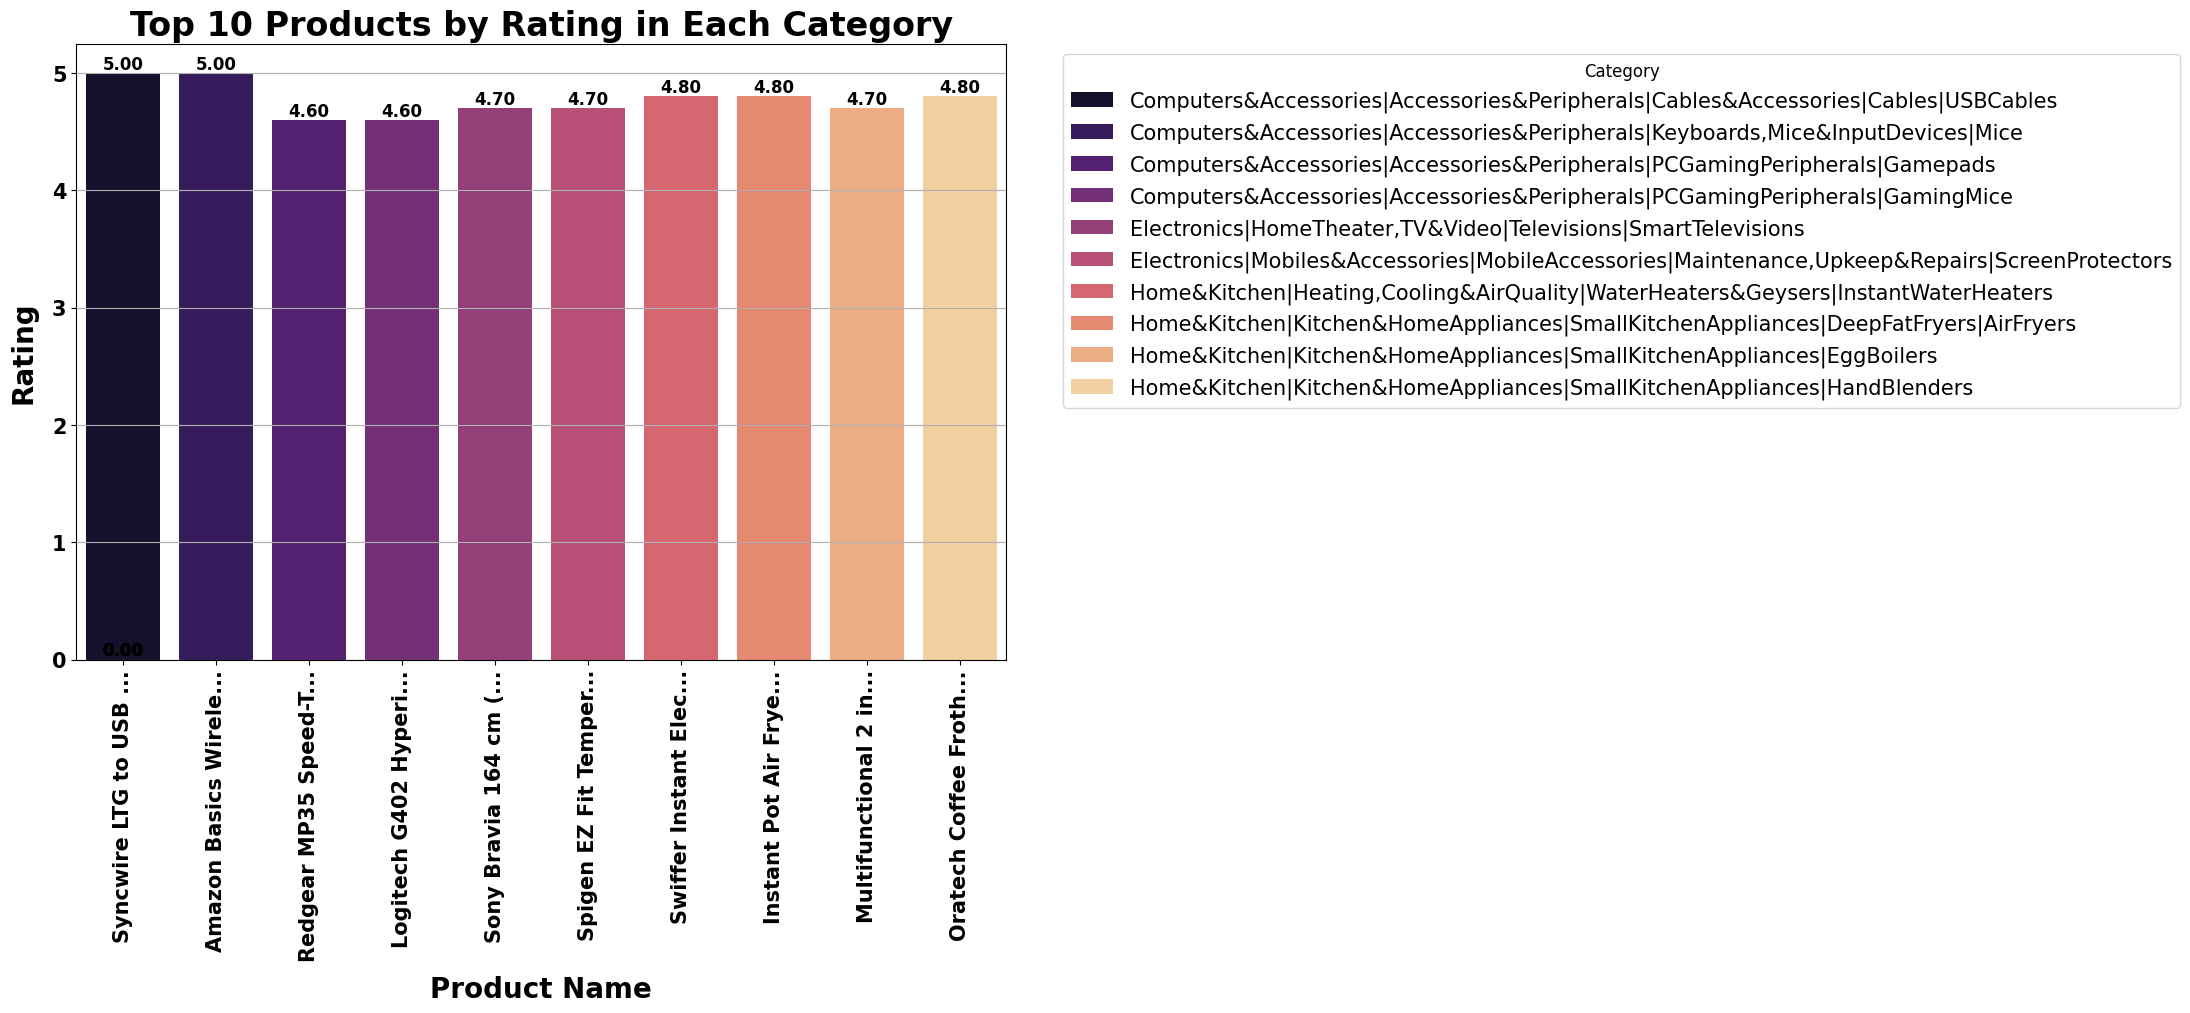

In [46]:
# Identify top products by rating in each category
top_products_by_category = df.loc[df.groupby('category')['rating'].idxmax()]

# Select relevant columns
top_products_by_category = top_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Sort by rating and select the first 10 products
top_10_products = top_products_by_category.nlargest(10, 'rating')

# Sort the results by category for better visualization
top_10_products_sorted = top_10_products.sort_values(by='category')

# Create a new column to truncate product names for better visualization
top_10_products_sorted['short_product_name'] = top_10_products_sorted['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

# Set the aesthetics for the plot
plt.figure(figsize=(12, 8))  # Adjust size for vertical plot
barplot = sns.barplot(data=top_10_products_sorted, x='short_product_name', y='rating', hue='category', dodge=False, palette='magma')

# Add titles and labels with enhanced prominence
plt.title('Top 10 Products by Rating in Each Category', fontsize=24, fontweight='bold')  # Adjusted title font size
plt.ylabel('Rating', fontsize=20, fontweight='bold', labelpad=10)  # Adjusted y-axis label font size
plt.xlabel('Product Name', fontsize=20, fontweight='bold', labelpad=10)  # Adjusted x-axis label font size

# Adjust legend size
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, title_fontsize=12)

# Make ticks more prominent
plt.xticks(fontsize=15, fontweight='bold', rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=15, fontweight='bold')

# Add value labels above each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y')  # Adjust grid to y-axis for vertical bars

# Show plot
plt.tight_layout()
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the Least Rated Products by Category</p>


In [47]:
# Step 1: Find the minimum rating for each category
least_products_by_category = df.loc[df.groupby('category')['rating'].idxmin()]

# Step 2: Select relevant columns
least_products_by_category = least_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Step 3: Sort by rating and select the first 10 products
least_10_products = least_products_by_category.nsmallest(10, 'rating')

# Step 4: Display the result
least_10_products_sorted = least_10_products.sort_values(by='category')

# Display the result
least_10_products_sorted


category  \
282          Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
263                                Electronics|HomeTheater,TV&Video|Accessories|RemoteControls   
545                                                Electronics|WearableTechnology|SmartWatches   
1309                            Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters   
1251  Home&Kitchen|Kitchen&HomeAppliances|SewingMachines&Accessories|Sewing&EmbroideryMachines   
1243                   Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders   
1286            Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders   
1314                        Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|Juicers   
1356                  Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers   
1449   Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterPurifierAccessories   

      product_id  \
282   B0B94JPY2N   
263   B09F6D21BY   
545   B0BBVKRP7B   
1309  B0BPJBTB3F   
1251  B08XLR6DSB   
1243  B0BFBNXS94   
1286  B0BNDGL26T   
1314  B08TT63N58   
1356  B0B7L86YCB   
1449  B0BBLHTRM9   

                                                                                                                                                                                 product_name  \
282                                                        Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)   
263                                       7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys   
545                                                                                        SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black)   
1309                                                                                                                                    Khaitan ORFin Fan heater for Home and kitchen-K0 2215   
1251    akiara - Makes life easy Electric Handy Sewing/Stitch Handheld Cordless Portable White Sewing Machine for Home Tailoring, Hand Machine | Mini Silai | White Hand Machine with Adapter   
1243                               Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)   
1286                           MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)   
1314                              ROYAL STEP - AMAZON'S BRAND - Portable Electric USB Juice Maker Juicer Bottle Blender Grinder Mixer,4 Blades Rechargeable Bottle with (Multi color) (MULTI)   
1356                                                                                                Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging   
1449  IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1   

      rating  
282      3.0  
263      3.0  
545      2.8  
1309     2.0  
1251     3.1  
1243     2.3  
1286     2.8  
1314     3.1  
1356     2.6  
1449     2.9

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the Least Rated Products by Category</p>


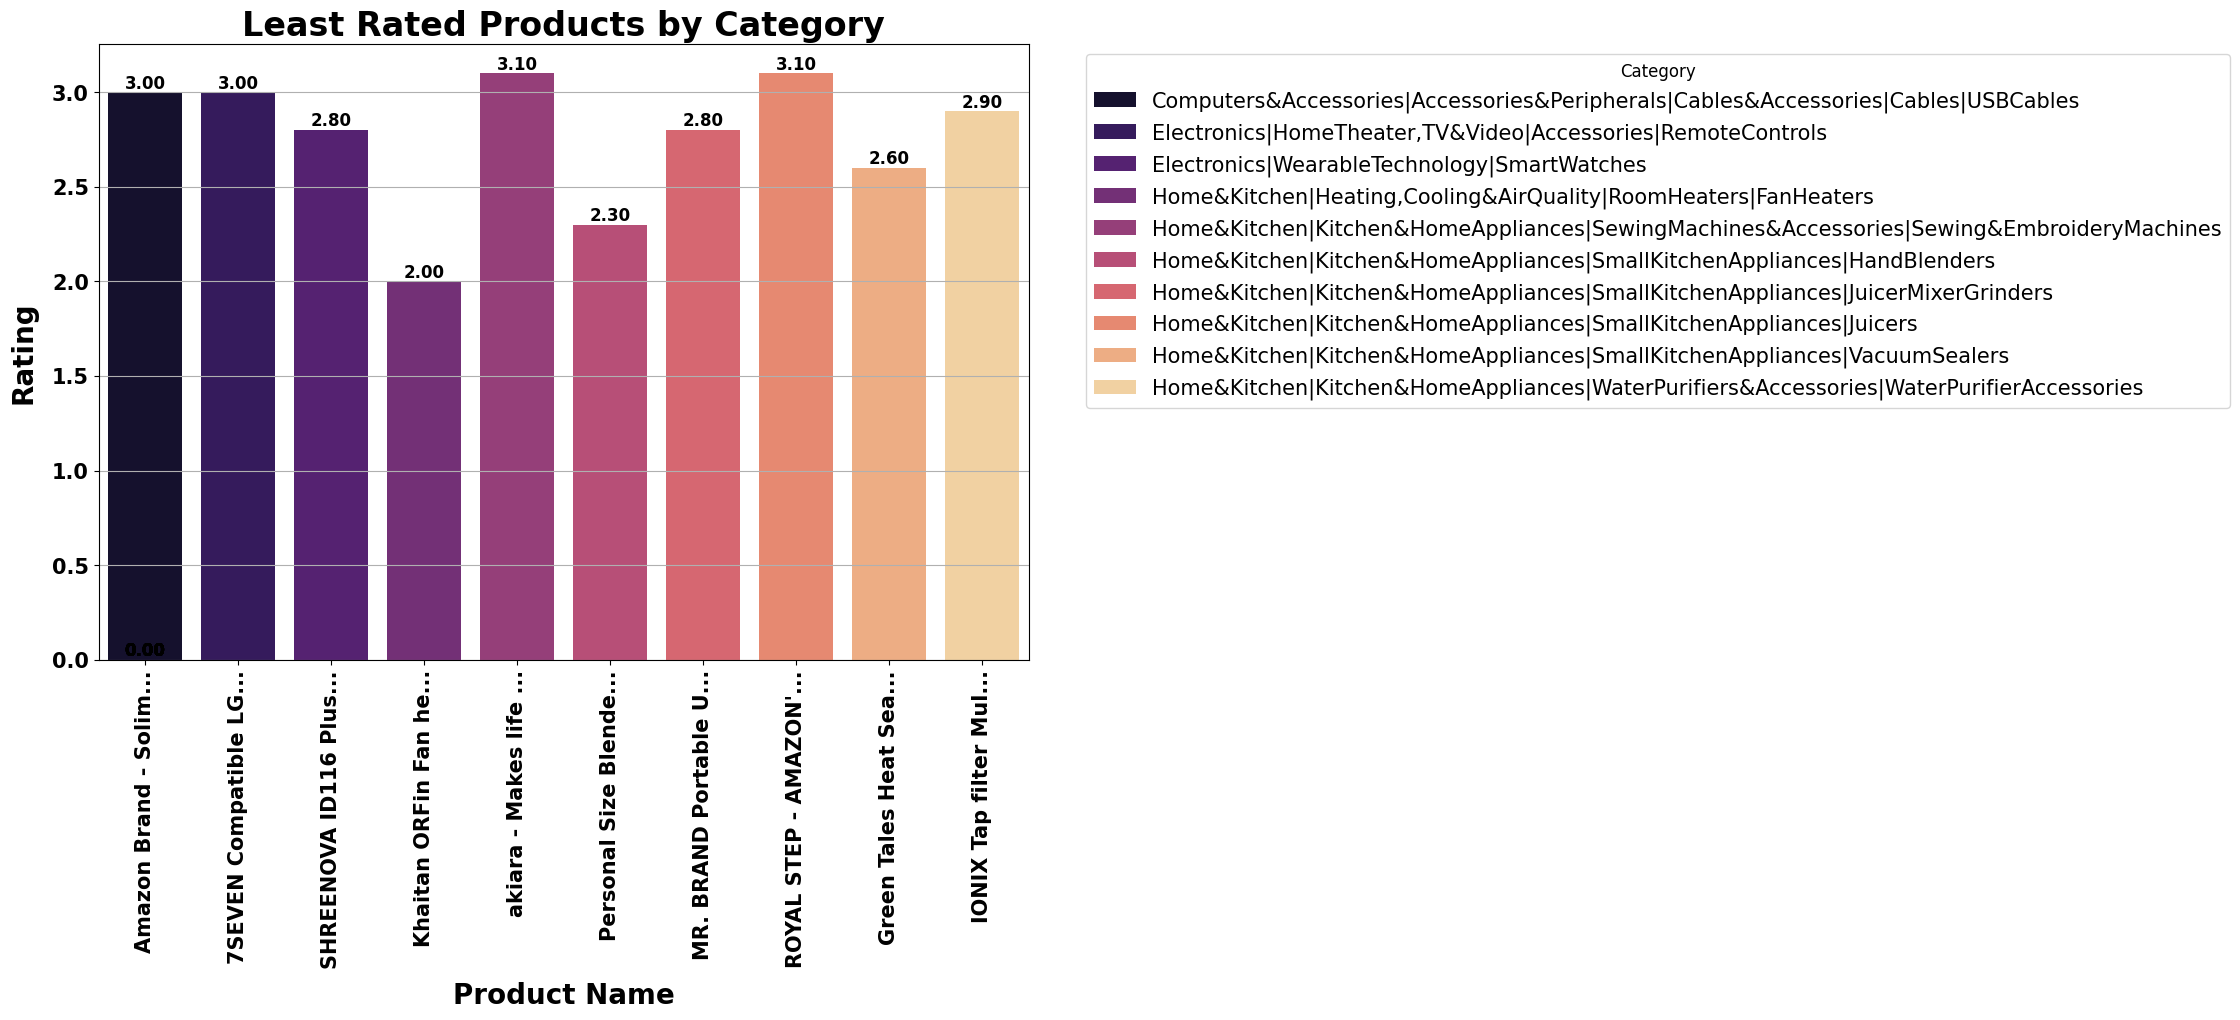

In [48]:
# Step 1: Find the minimum rating for each category
least_products_by_category = df.loc[df.groupby('category')['rating'].idxmin()]

# Step 2: Select relevant columns
least_products_by_category = least_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Step 3: Sort by rating and select the first 10 products
least_10_products = least_products_by_category.nsmallest(10, 'rating')

# Step 4: Sort the results by category for better visualization
least_10_products_sorted = least_10_products.sort_values(by='category')

# Create a new column to truncate product names for better visualization
least_10_products_sorted['short_product_name'] = least_10_products_sorted['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

# Set the aesthetics for the plot
plt.figure(figsize=(12, 8))  # Adjust size for vertical plot
barplot = sns.barplot(data=least_10_products_sorted, x='short_product_name', y='rating', hue='category', dodge=False, palette='magma')

# Add titles and labels with enhanced prominence
plt.title('Least Rated Products by Category', fontsize=24, fontweight='bold')  # Adjusted title font size
plt.ylabel('Rating', fontsize=20, fontweight='bold', labelpad=10)  # Adjusted y-axis label font size
plt.xlabel('Product Name', fontsize=20, fontweight='bold', labelpad=10)  # Adjusted x-axis label font size

# Adjust legend size
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, title_fontsize=12)

# Make ticks more prominent
plt.xticks(fontsize=15, fontweight='bold', rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=15, fontweight='bold')

# Add value labels above each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y')  # Adjust grid to y-axis for vertical bars

# Show plot
plt.tight_layout()
plt.show()


## **Observations:**

* The highest rated product in the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | DVI Cables` category is **AmazonBasics 6 Feet DisplayPort to DisplayPort Cable** with a rating of **4.4**.
* In the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | Ethernet Cables` category, the **Quantum RJ45 Ethernet Patch Cable** also has a high rating of **4.4**.
* The lowest rated product in the `Home & Kitchen | Heating, Cooling & Air Quality | Room Heaters | Fan Heaters` category is **Khaitan ORFin Fan Heater** with a rating of **2.0**.


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the Top Rated Products</p>


In [49]:
# Identify products with the highest rating overall
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)

# Select relevant columns
top_rated_products = top_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Display the 10 highest rated products
top_rated_products


category  \
775       Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice   
174    Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
324    Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
1299  Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers   
1145    Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters   
1201             Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders   
1388    Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters   
1223             Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders   
1275               Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|EggBoilers   
1226             Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders   

      product_id  \
775   B09ZHCJDP1   
174   B0BP7XLX48   
324   B0BQRJ3C47   
1299  B0B53DS4TF   
1145  B0BR4F878Q   
1201  B0BQ3K23Y1   
1388  B0BP89YBC1   
1223  B0BM4KTNL1   
1275  B0BM9H2NY9   
1226  B0BLC2BYPX   

                                                                                                                                                                                                                                                                      product_name  \
775                                                                                                             Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop   
174                                                                                                Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)   
324                                                                                  REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White   
1299                                                                                              Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)   
1145                                                                                          Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))   
1201  Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)   
1388                                                                            Campfire Spring Chef Prolix Instant Portable Water Heater Geyser 1Ltr. for Use Home Stainless Steel Baking Rack | Restaurant | Office | Labs | Clinics | Saloon | with Installation Kit (With MCB)   
1223                                                                                           FIGMENT Handheld Milk Frother Rechargeable, 3-Speed Electric Frother for Coffee with 2 Whisks and Coffee Decoration Tool, Coffee Frother Mixer, CRESCENT ENTERPRISES VRW0.50BK (A1)   
1275                                                                                            Multifunctional 2 in 1 Electric Egg Boiling Steamer Egg Frying Pan Egg Boiler Electric Automatic Off with Egg Boiler Machine Non-Stick Electric Egg Frying Pan-Tiger Woods (Multy)   
1226                                                              

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the Top Rated Products</p>

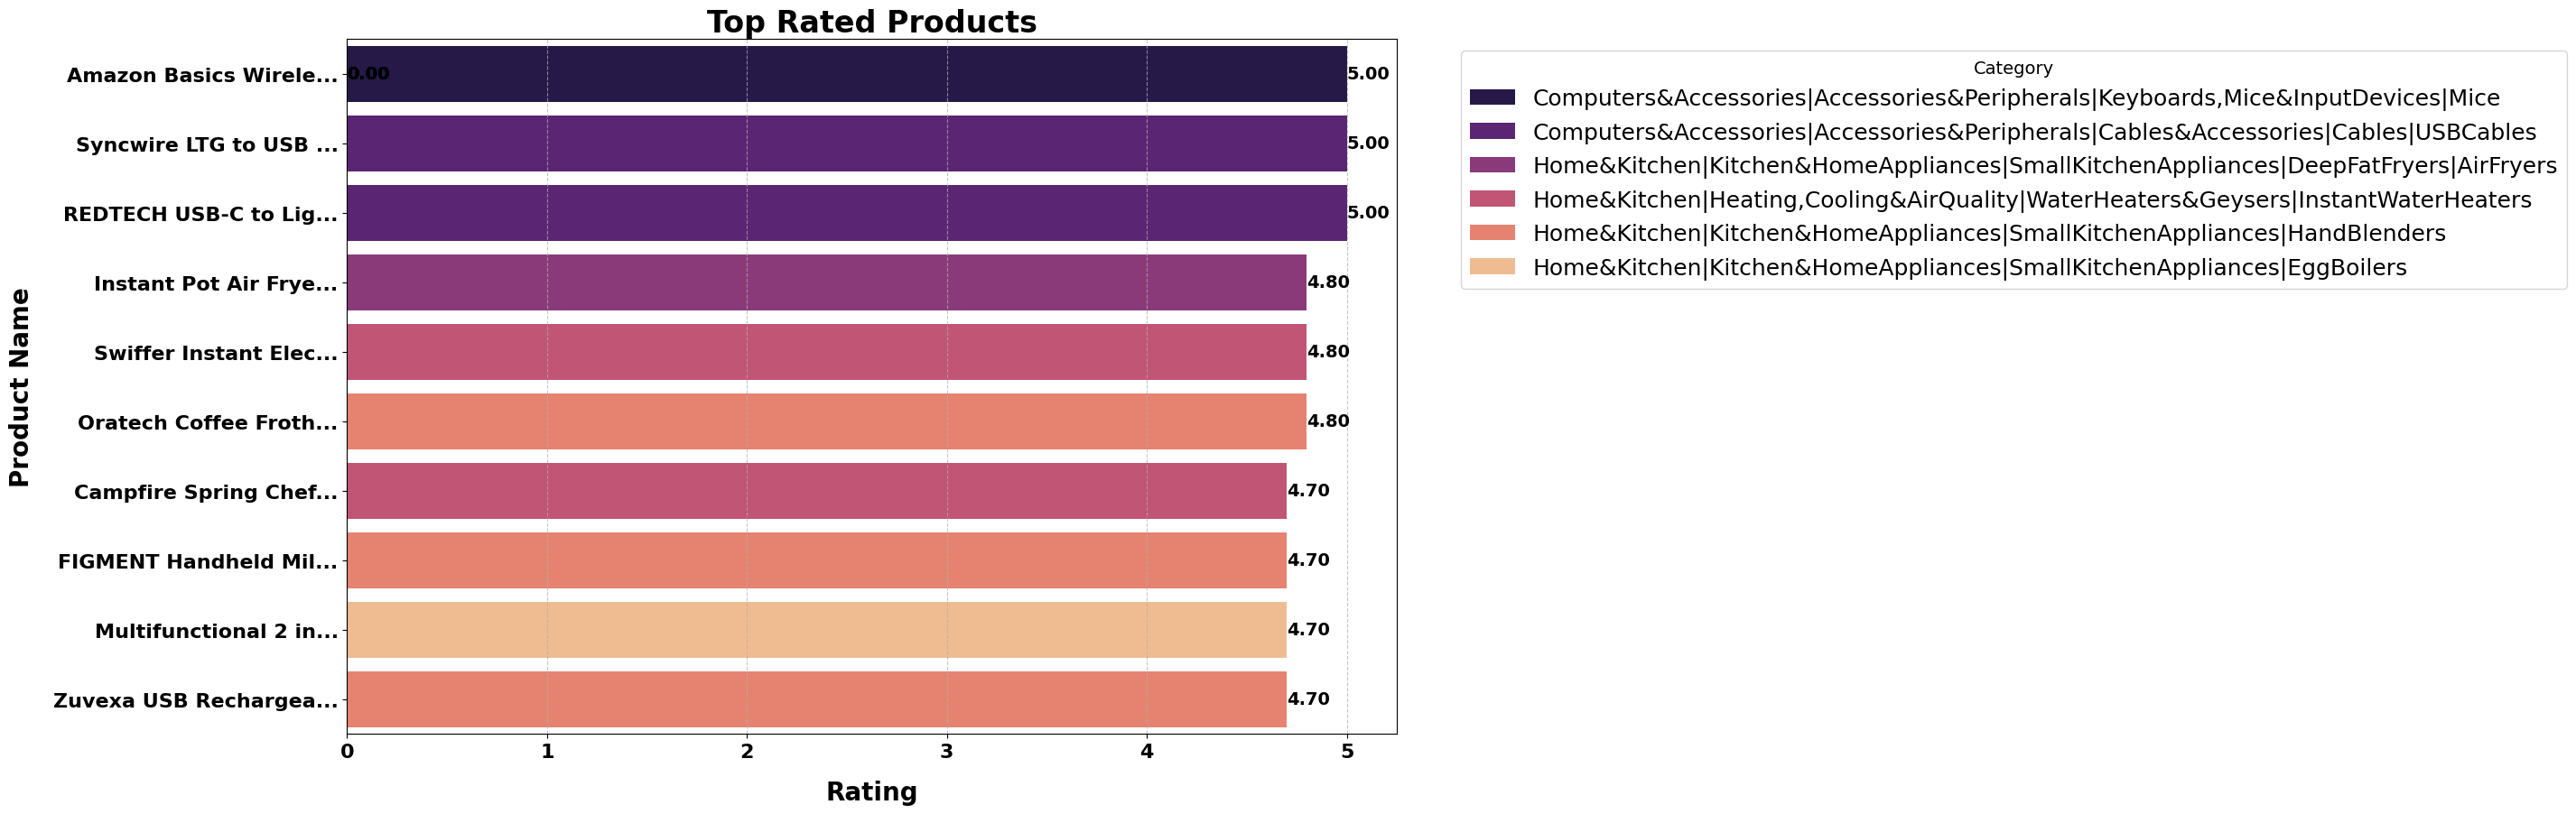

In [50]:
# Identify products with the highest rating overall
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)

# Select relevant columns
top_rated_products = top_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Create a new DataFrame for the plot
top_rated_products['short_product_name'] = top_rated_products['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

# Set the aesthetics for the plot
plt.figure(figsize=(15, 10))

# Create a color palette based on the unique categories
unique_categories = top_rated_products['category'].unique()
palette = sns.color_palette("magma", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))

# Create a horizontal bar plot with stacked bars
barplot = sns.barplot(data=top_rated_products, y='short_product_name', x='rating', hue='category', dodge=False, palette=category_color_map)

# Add titles and labels with enhanced prominence
plt.title('Top Rated Products', fontsize=24, fontweight='bold')
plt.xlabel('Rating', fontsize=20, fontweight='bold', labelpad=15)
plt.ylabel('Product Name', fontsize=20, fontweight='bold', labelpad=15)

# Adjust legend size and position
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=14)

# Make ticks more prominent
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Add value labels to each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.2f}',
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='left', va='center',
                     fontsize=14, fontweight='bold', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the Least Rated Products</p>

In [51]:
# Identify products with the least rating overall
least_rated_products = df.sort_values(by='rating').head(10)

# Select relevant columns
least_rated_products = least_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Display the 10 least rated products
least_rated_products

category  \
1309                           Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters   
1243                  Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders   
1356                 Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers   
1286           Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders   
545                                               Electronics|WearableTechnology|SmartWatches   
1449  Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterPurifierAccessories   
263                               Electronics|HomeTheater,TV&Video|Accessories|RemoteControls   
550                                               Electronics|WearableTechnology|SmartWatches   
1315                 Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers   
282         Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   

      product_id  \
1309  B0BPJBTB3F   
1243  B0BFBNXS94   
1356  B0B7L86YCB   
1286  B0BNDGL26T   
545   B0BBVKRP7B   
1449  B0BBLHTRM9   
263   B09F6D21BY   
550   B0B82YGCF6   
1315  B08YK7BBD2   
282   B0B94JPY2N   

                                                                                                                                                                                       product_name  \
1309                                                                                                                                          Khaitan ORFin Fan heater for Home and kitchen-K0 2215   
1243                                     Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)   
1356                                                                                                      Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging   
1286                                 MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)   
545                                                                                              SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black)   
1449        IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1   
263                                             7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys   
550                          Tokdis MX-1 Pro Bluetooth Calling Smartwatch - 1.69” LCD Display, Multiple Watch Faces, Sleep Monitor, Heart & SpO2 Monitoring, Multiple Sports Modes, Water Resistant   
1315  Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer and Cutter Handheld Sealing Machine Portable Bag Resealer Sealer for Plastic Bags Food Storage Snack Fresh Bag Sealer (Including 2 AA Battery)   
282                                                              Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)   

      rating  
1309     2.0  
1243     2.3  
1356     2.6  
1286     2.8  
545      2.8  
1449     2.9  
263      3.0  
550      3.0  
1315     3.0  
282      3.0

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the Least Rated Products</p>

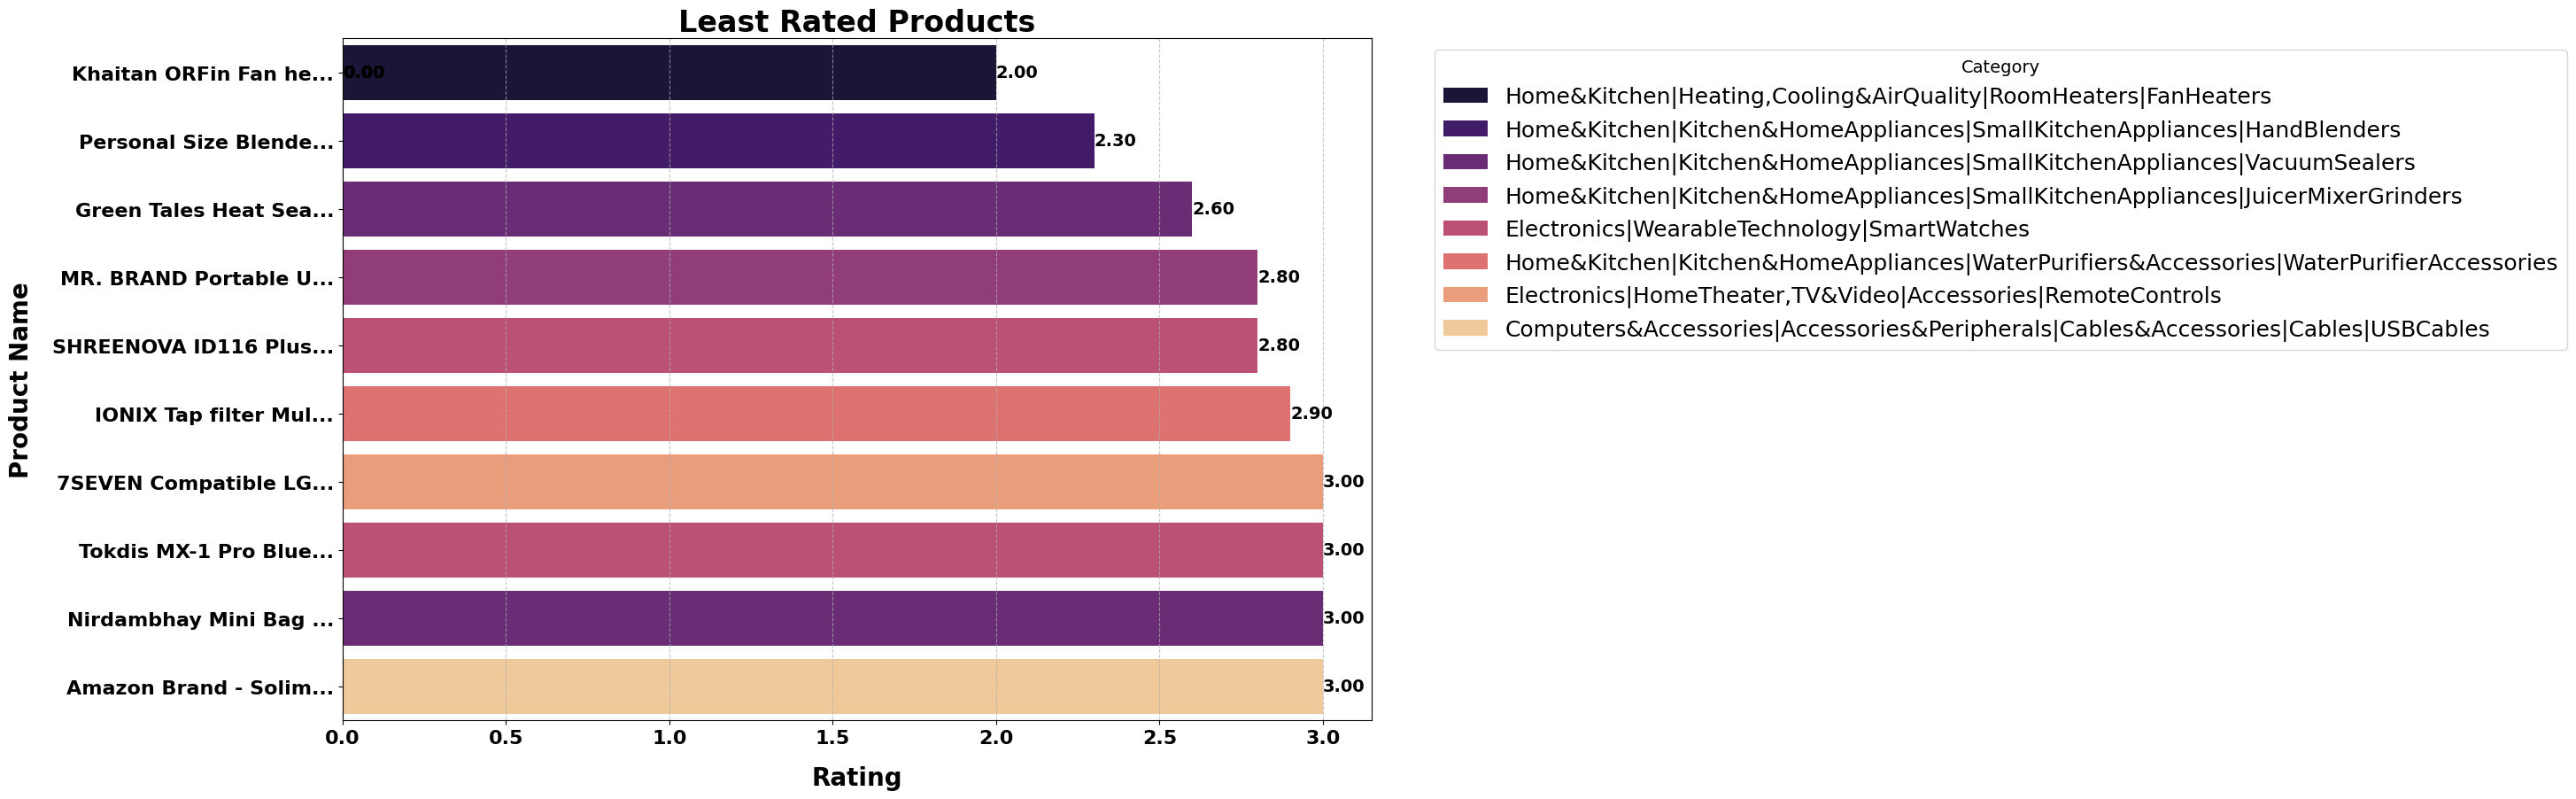

In [52]:
# Identify products with the least rating overall
least_rated_products = df.sort_values(by='rating').head(10)

# Select relevant columns
least_rated_products = least_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Create a new DataFrame for the plot
least_rated_products['short_product_name'] = least_rated_products['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

# Set the aesthetics for the plot
plt.figure(figsize=(15, 10))

# Create a color palette based on the unique categories
unique_categories = least_rated_products['category'].unique()
palette = sns.color_palette("magma", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))

# Create a horizontal bar plot with stacked bars
barplot = sns.barplot(data=least_rated_products, y='short_product_name', x='rating', hue='category', dodge=False, palette=category_color_map)

# Add titles and labels with enhanced prominence
plt.title('Least Rated Products', fontsize=24, fontweight='bold')
plt.xlabel('Rating', fontsize=20, fontweight='bold', labelpad=15)
plt.ylabel('Product Name', fontsize=20, fontweight='bold', labelpad=15)

# Adjust legend size and position
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=14)

# Make ticks more prominent
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Add value labels to each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.2f}',
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='left', va='center',
                     fontsize=14, fontweight='bold', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


## **Observations:**
* The highest-rated product is **REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White** with a product ID of B0BQRJ3C47, belonging to the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category, with a rating of **5.0**.
* Another highly-rated product is **Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/5C/5S/6/6S/7/8/X/XR/XS Max/11/12/13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)** with a product ID of B0BP7XLX48, also in the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category, with a rating of **5.0**.
* Similarly, **Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type-C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop** with a product ID of B09ZHCJDP1, in the `Computers & Accessories | Accessories & Peripherals | Keyboards, Mice & Input Devices | Mice` category, also has a rating of **5.0**.
* The lowest-rated product is **Khaitan ORFin Fan Heater for Home and Kitchen-K0 2215** with a product ID of B0BPJBTB3F, belonging to the `Home & Kitchen | Heating, Cooling & Air Quality | Room Heaters | Fan Heaters` category, with a rating of **2.0**.


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Feature Engineering</p>

In [53]:
# Calculate the mean rating based on discounted price ranges
df['price_range'] = pd.cut(df['discounted_price'], bins=[30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0],
                           labels = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+'])



price_rating_analysis = df.groupby('price_range').agg(
    mean_rating=('rating', 'mean'),
    product_count=('product_id', 'nunique'),
    average_rating_count=('rating_count', 'mean')
).reset_index()

# Display the price rating analysis
price_rating_analysis


price_range  mean_rating  product_count  average_rating_count
0      30-100     4.064444             40           7440.977778
1     100-500     4.075330            461          17813.723164
2    500-1000     4.117063            237          21177.813492
3   1000-5000     4.077355            410          18257.164733
4  5000-10000     4.141667             84          21546.571429
5      10000+     4.195082            119          16143.188525

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the Average Rating Based on Discounted Price Range</p>

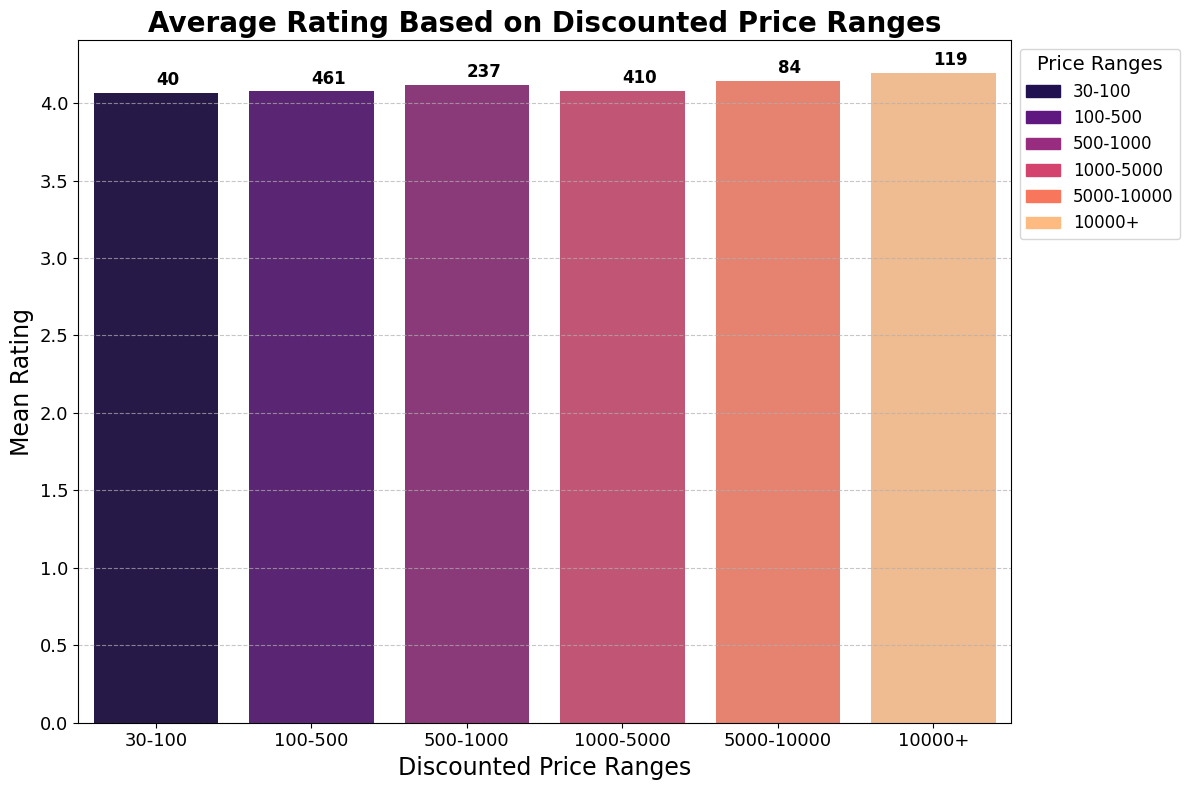

In [54]:
# Set the aesthetics for the plot
plt.figure(figsize=(12, 8))

# Create a bar plot for mean ratings with the magma palette
bar_plot = sns.barplot(data=price_rating_analysis, x='price_range', y='mean_rating', palette='magma', capsize=0.1)

# Add data labels for product count
for index, row in price_rating_analysis.iterrows():
    plt.text(index, row['mean_rating'] + 0.05,
             f'{row["product_count"]}',
             fontsize=12,
             fontweight='bold',
             color='black')

# Titles and labels
plt.title('Average Rating Based on Discounted Price Ranges', fontsize=20, fontweight='bold')
plt.xlabel('Discounted Price Ranges', fontsize=17)
plt.ylabel('Mean Rating', fontsize=17)

# Enhance ticks
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Show grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create a custom legend
# Create patches for the legend using the colors from the palette
from matplotlib.patches import Patch

# Generate a list of colors from the 'magma' palette for the legend
colors = sns.color_palette('magma', len(price_rating_analysis))
legend_labels = price_rating_analysis['price_range'].tolist()

# Create legend handles
handles = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=handles, title='Price Ranges', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Calculate the Reviews and Ratings Per Product</p>

In [55]:
# Create a new DataFrame for analysis
category_product_counts = df.groupby('category').agg(
    product_count=('product_id', 'nunique'),
    total_reviews=('review_id', 'count'),
    mean_rating=('rating', 'mean')
).reset_index()

# Calculate the ratio of total reviews to product count
category_product_counts['reviews_per_product'] = category_product_counts['total_reviews'] / category_product_counts['product_count']

# Display the analysis
category_product_counts.sort_values(by='mean_rating', ascending=False, inplace=True)
# Filter for categories with highest product count and total reviews
top_categories = category_product_counts.nlargest(10, 'product_count')

# Display the top 10 categories
top_categories.sort_values(by='total_reviews', ascending=False)


category  \
10                       Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
119                                                            Electronics|WearableTechnology|SmartWatches   
117                                   Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones   
97                                           Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
76                                            Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear   
93                                             Electronics|HomeTheater,TV&Video|Accessories|RemoteControls   
169                               Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders   
18                          Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice   
181  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons   
140                       Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters   

     product_count  total_reviews  mean_rating  reviews_per_product  
10             161            233     4.151931             1.447205  
119             62             76     4.025000             1.225806  
117             68             68     4.100000             1.000000  
97              60             63     4.209524             1.050000  
76              51             52     3.898077             1.019608  
93              49             49     3.800000             1.000000  
169             27             27     4.011111             1.000000  
18              24             24     4.287500             1.000000  
181             24             24     4.129167             1.000000  
140             23             23     4.052174             1.000000

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the Top Products By Rating Percentage</p>

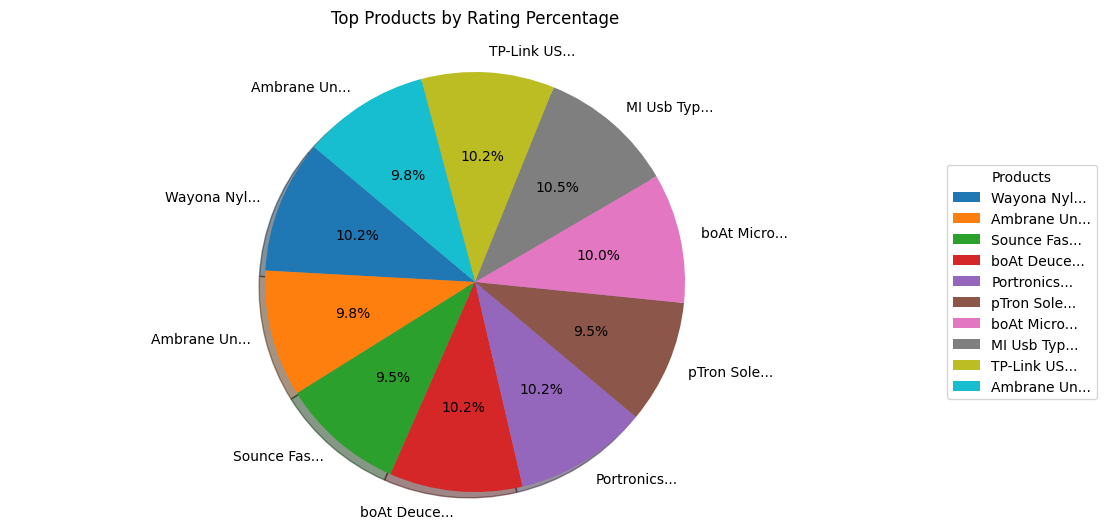

In [56]:
# Calculate rating percentage
df['rating_percentage'] = (df['rating'] / 5) * 100

# Select the top products by rating percentage for clarity in the pie chart
top_products = df[['product_id', 'product_name', 'category', 'rating_percentage']].head(10)

# Create a concise label for the legend
top_products['label'] = top_products['product_name'].str[:10] + '...'  # Display first 10 characters with ellipsis

# Plot the pie chart with an increased figure size
plt.figure(figsize=(12, 6))  # Increased size
plt.pie(top_products['rating_percentage'], labels=top_products['label'], autopct='%1.1f%%', startangle=140, shadow=True)

# Add title and legend with padding
plt.title('Top Products by Rating Percentage', pad=20)  # Added pad for distance
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(top_products['label'], title='Products', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display Top Rated Products and Categories Percentage</p>

In [57]:
# Calculate rating percentage
df['rating_percentage'] = (df['rating'] / 5) * 100

# Display the updated DataFrame with the new column
df[['product_id', 'product_name', 'category', 'rating', 'rating_percentage']].head()


product_id  \
0  B07JW9H4J1   
1  B098NS6PVG   
2  B096MSW6CT   
3  B08HDJ86NZ   
4  B08CF3B7N1   

                                                                                                                                                                                              product_name  \
0                                       Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)   
1        Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)   
2                                                                 Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)   
4                                                                                           Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)   

                                                                            category  \
0  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
1  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
2  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
3  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
4  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   

   rating  rating_percentage  
0     4.2               84.0  
1     4.0               80.0  
2     3.9               78.0  
3     4.2               84.0  
4     4.2               84.0

## **Observations:**

| Metric                                                        | Value                                         |
|---------------------------------------------------------------|-----------------------------------------------|
| **Highest Average Rating**                                    | 4.141667 (5000-10000 sales price range)       |
| **Product Count**                                             | 84                                            |
| **Average Highest Rating Count**                              | 21546.571429                                  |

| Category                                                                                          | Review Count | Product Count | Mean Rating | Reviews per Product |
|--------------------------------------------------------------------------------------------------|--------------|---------------|-------------|---------------------|
| **Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables** | 233          | 161           | 4.151931    | 1.447205            |

| Product Name                                                                                                                                          | Product ID | Rating | Rating Percentage |
|-------------------------------------------------------------------------------------------------------------------------------------------------------|------------|--------|-------------------|
| **Wayona Nylon Braided USB to Lightning Fast Charging & Data Sync Cable Compatible with iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT)**  | B07JW9H4J1 | 4.2    | 8.4%              |
| **boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable (Martian Red)**                                              | B08HDJ86NZ | 4.2    | 8.4%              |
| **Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable for iPhone, iPad (Grey)**                                                                    | B07JW9H4J1 | 4.2    | 8.4%              |


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Explore the Top Categories of the Dataset</p>

In [58]:
# 1. Count the number of products in each category
category_counts = df['category'].value_counts()

# 2. Find the top 10 categories with the highest count
top_10_categories = category_counts.nlargest(10)

# 3. Filter the dataframe to only include products from these top 10 categories
top_10_category_products = df[df['category'].isin(top_10_categories.index)]

# Display the results
top_10_categories


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        233
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                            24
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            24
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons     24
Name: count, dtype: int64

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualzie the Top Categories by Number of Products</p>

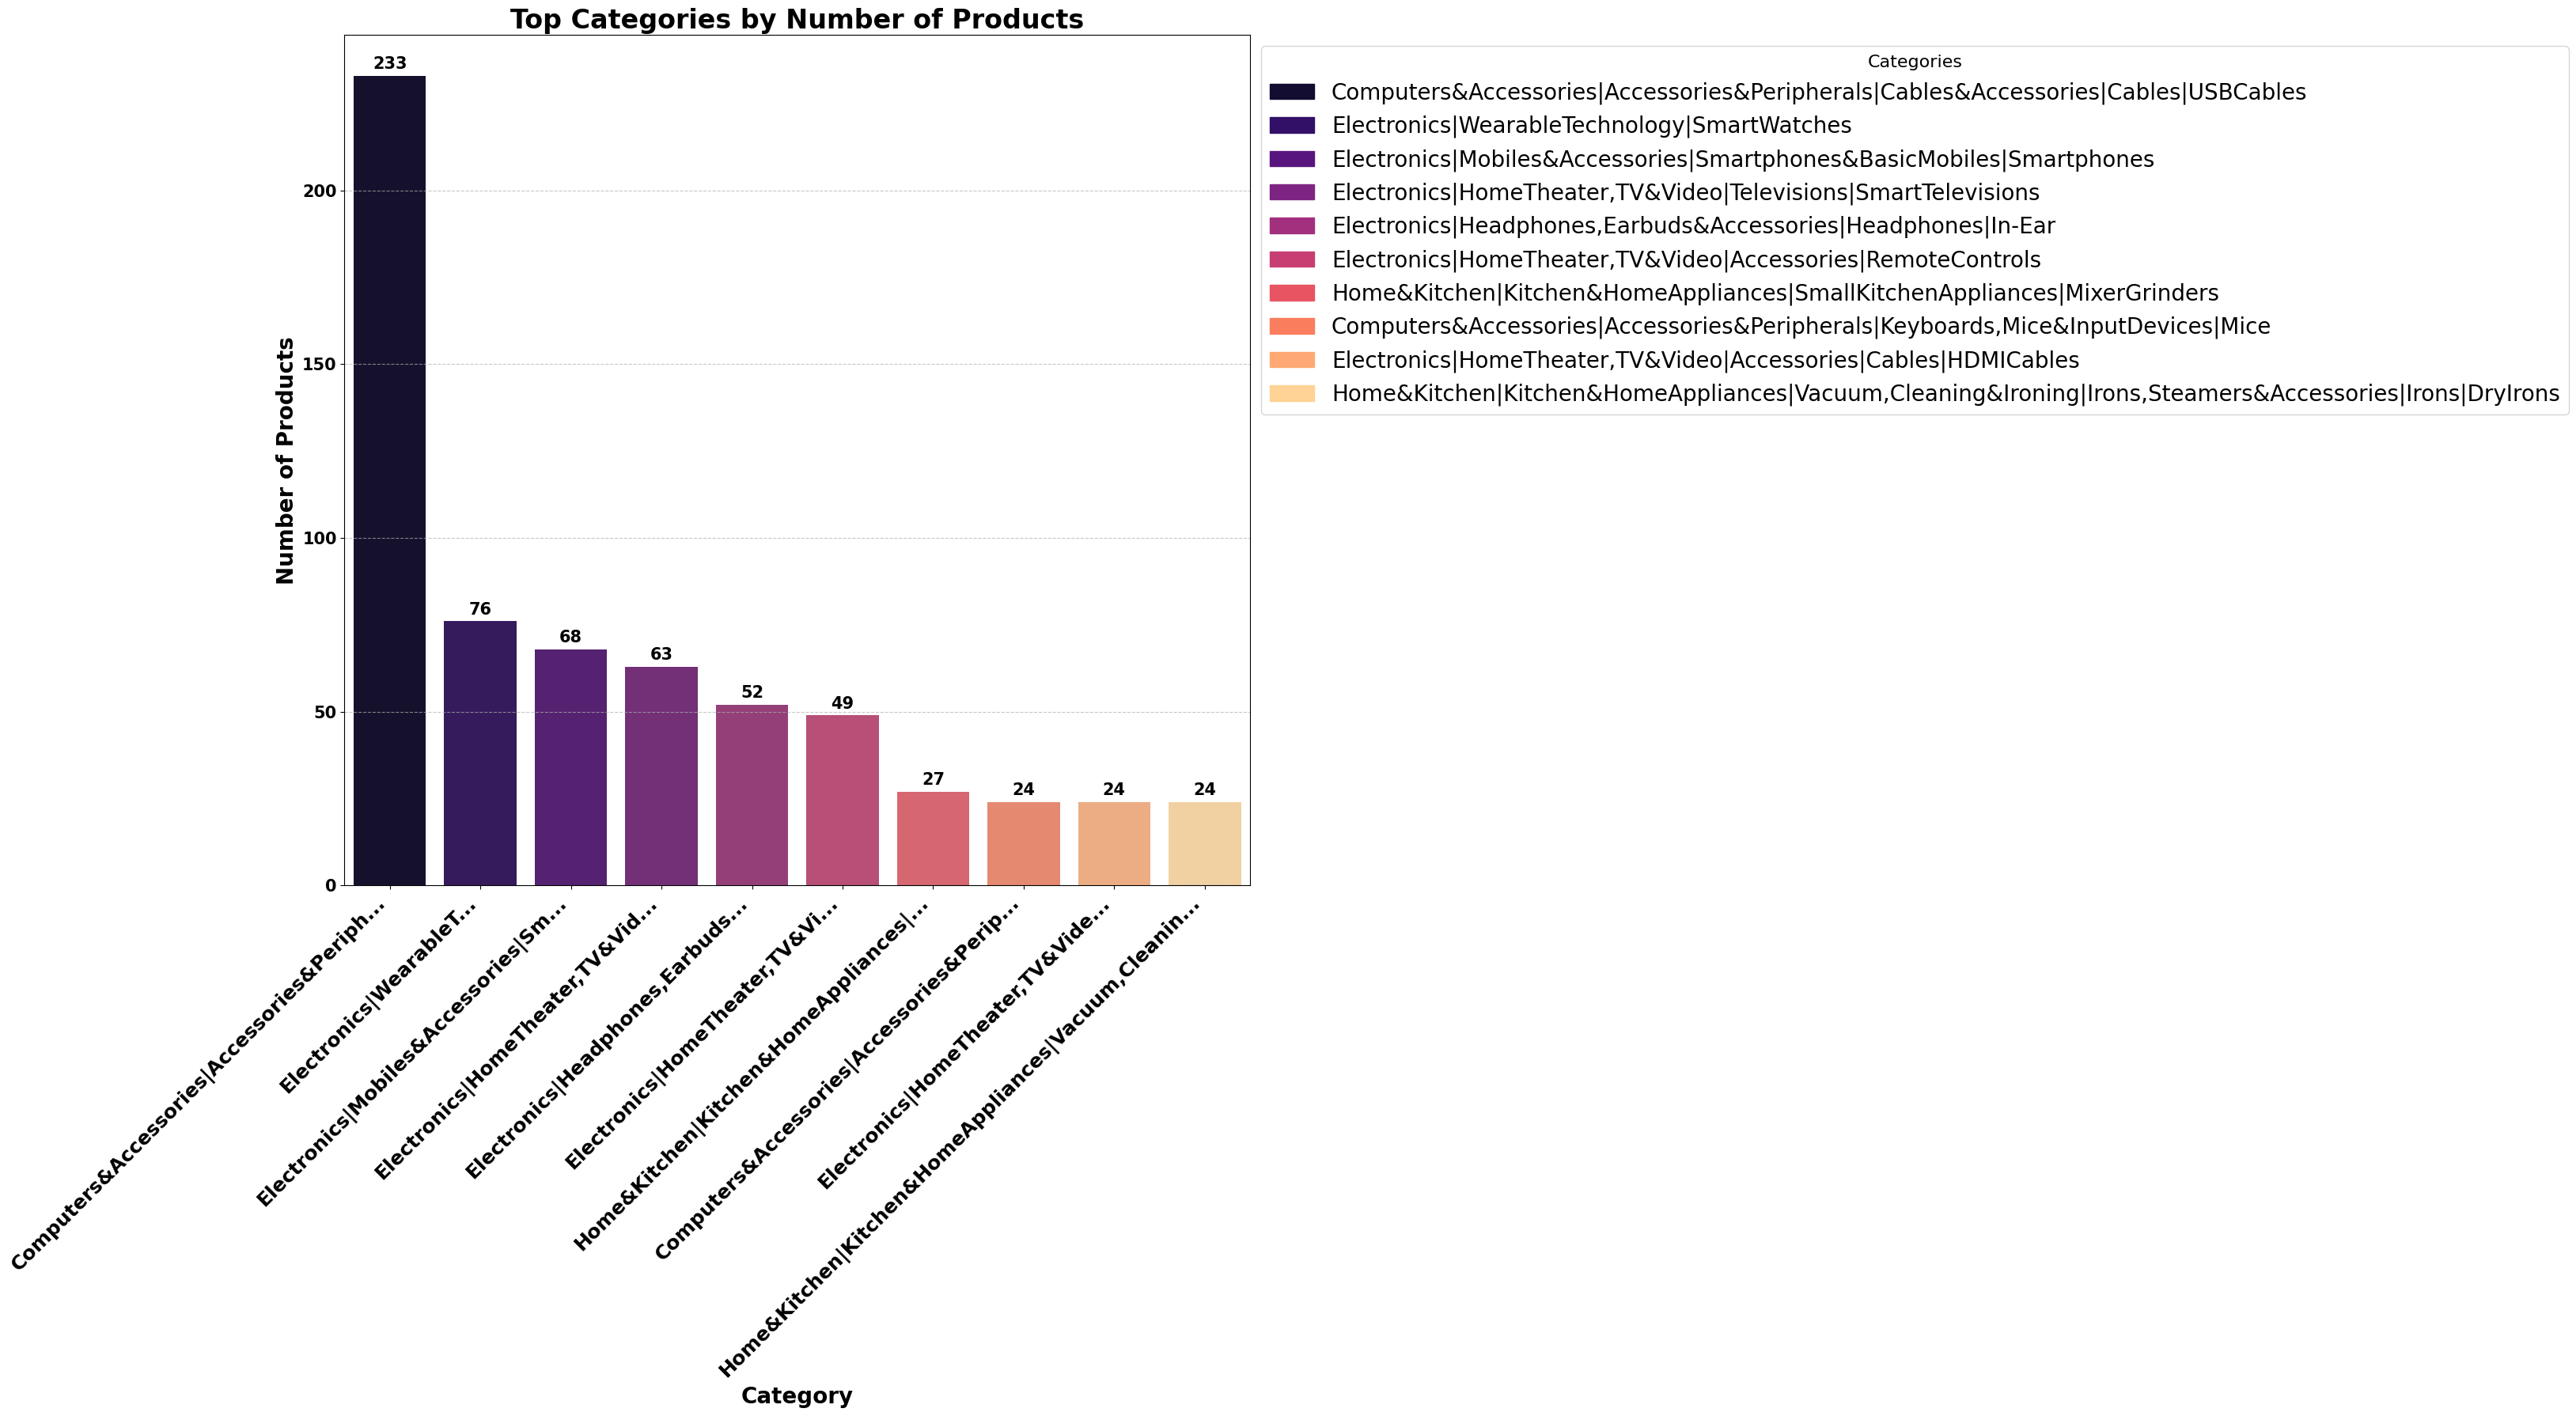

In [59]:
# Function to shorten the category names (take half and add dots)
def shorten_name(name):
    max_len = len(name) // 2  # Take half the length
    return name[:max_len] + '...' if len(name) > 10 else name  # Shorten if necessary

# Apply the shortening function to the category names
shortened_categories = [shorten_name(category) for category in top_10_categories.index]

# Create a color palette based on the number of categories
colors = sns.color_palette('magma', len(top_10_categories))

# 1. Create a bar plot using seaborn with magma color palette
plt.figure(figsize=(32, 18))  # Increase figure size for better prominence
barplot = sns.barplot(y=top_10_categories.values, x=shortened_categories, palette=colors)

# 2. Add labels and title with bold font
plt.xlabel('Category', fontsize=20, fontweight='bold')  # Bold and larger font for x-axis label
plt.ylabel('Number of Products', fontsize=20, fontweight='bold')  # Bold and larger font for y-axis label
plt.title('Top Categories by Number of Products', fontsize=24, fontweight='bold')  # Bold and larger font for title

# 3. Annotate each bar with the value (the number of products) with larger font size
for i, value in enumerate(top_10_categories.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=15, fontweight='bold')  # Larger and bold font for annotations

# 4. Rotate the category names for better readability
plt.xticks(rotation=45, ha='right', fontsize=18, fontweight='bold')  # Bold and larger font for x-ticks
# 4. Rotate the category names for better readability
plt.yticks(fontsize=15, fontweight='bold')
# 5. Create a legend using full names with larger font size
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(shortened_categories))]
plt.legend(handles, top_10_categories.index, title='Categories', bbox_to_anchor=(1, 1), loc='upper left', fontsize=20, title_fontsize=16)

# 6. Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# 7. Show the plot
plt.tight_layout()  # Ensure the plot fits within the figure
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the average ratings by Category</p>

In [60]:
# Group by category and calculate product count and average rating
category_summary = df.groupby('category').agg(
    product_count=('product_id', 'count'),  # Count of products per category
    average_rating=('rating', 'mean')  # Average rating per category
).reset_index()

# Sort the summary by product count in descending order and take the top 10
top_categories = category_summary.sort_values(by='product_count', ascending=False).head(10)
top_categories


category  \
10                       Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
119                                                            Electronics|WearableTechnology|SmartWatches   
117                                   Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones   
97                                           Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
76                                            Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear   
93                                             Electronics|HomeTheater,TV&Video|Accessories|RemoteControls   
169                               Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders   
89                                          Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables   
181  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons   
18                          Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice   

     product_count  average_rating  
10             233        4.151931  
119             76        4.025000  
117             68        4.100000  
97              63        4.209524  
76              52        3.898077  
93              49        3.800000  
169             27        4.011111  
89              24        4.254167  
181             24        4.129167  
18              24        4.287500

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualzie the Top Categories by Average Ratings</p>

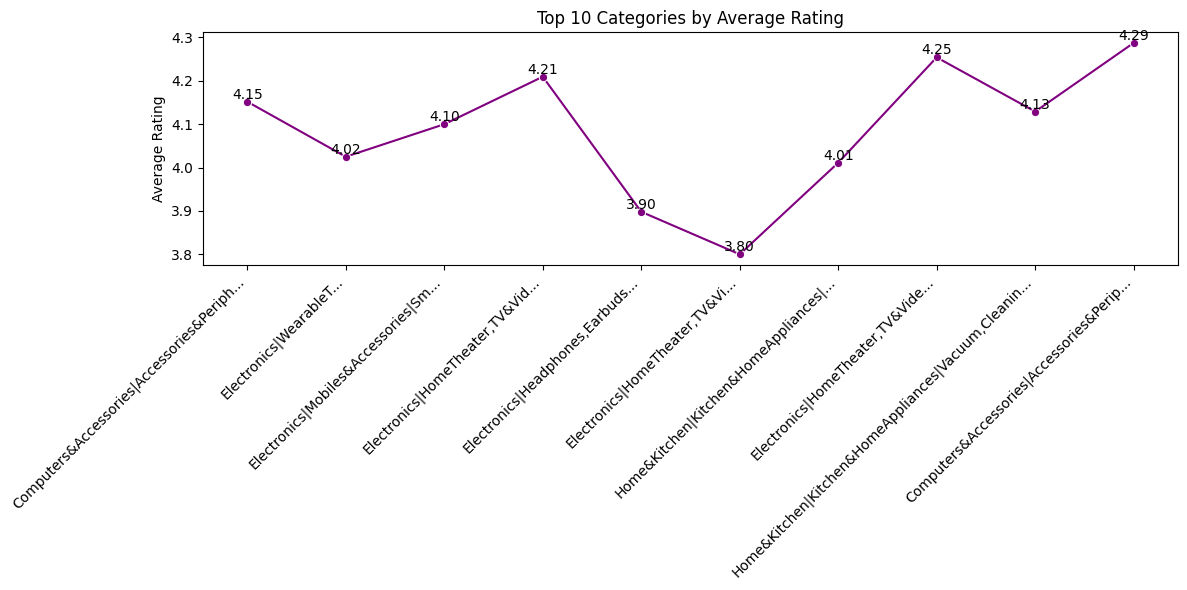

In [61]:
# Group by category and calculate product count and average rating
category_summary = df.groupby('category').agg(
    product_count=('product_id', 'count'),  # Count of products per category
    average_rating=('rating', 'mean')  # Average rating per category
).reset_index()

# Sort the summary by product count in descending order and take the top 10
top_categories = category_summary.sort_values(by='product_count', ascending=False).head(10)

# Shorten category names
shortened_categories = [f"{cat[:len(cat)//2]}..." for cat in top_categories['category']]

# Create a line plot for average ratings
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x=shortened_categories, y='average_rating', data=top_categories, marker='o', color='purple')

# Add values on the line plot
for index, value in enumerate(top_categories['average_rating']):
    line_plot.text(index, value, f'{value:.2f}', color='black', ha='center', va='bottom')

# Set labels and title
plt.ylabel('Average Rating', color='black')
plt.title('Top 10 Categories by Average Rating')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualzie the Discounted and Actual Price Vs Discounted Percentage</p>

In [62]:
# Create a subplot figure with two scatterplots side by side
fig = make_subplots(rows=1, cols=2, subplot_titles=("Discount % vs Discounted Price", "Discount % vs Actual Price"))

# Create a color map based on the magma color palette
categories = df['category'].unique()
colors = sns.color_palette("magma", len(categories))  # Get magma palette colors

# Map colors to categories
color_map = {category: f'rgba({int(color[0] * 255)}, {int(color[1] * 255)}, {int(color[2] * 255)}, 0.7)'
             for category, color in zip(categories, colors)}

# Abbreviate category names for the legend
category_abbreviations = {category: category[:10] + '...' if len(category) > 10 else category for category in categories}

# Scatterplot: Discount % vs Discounted Price
for category in categories:
    category_data = df[df['category'] == category]
    fig.add_trace(go.Scatter(
        x=category_data['discount_percentage'],
        y=category_data['discounted_price'],
        mode='markers',
        marker=dict(color=color_map[category], size=10),
        name=category_abbreviations[category],  # Use abbreviated names in the legend
        hoverinfo='text',
        hovertemplate=(
            f"<b>Category:</b> {category}<br>" +
            f"<b>Discount %:</b> %{{x}}<br>" +
            f"<b>Discounted Price:</b> $%{{y}}<br>" +
            "<extra></extra>"
        )
    ), row=1, col=1)

# Scatterplot: Discount % vs Actual Price
for category in categories:
    category_data = df[df['category'] == category]
    fig.add_trace(go.Scatter(
        x=category_data['discount_percentage'],
        y=category_data['actual_price'],
        mode='markers',
        marker=dict(color=color_map[category], size=10),
        name=category_abbreviations[category],  # Use abbreviated names in the legend
        hoverinfo='text',
        hovertemplate=(
            f"<b>Category:</b> {category}<br>" +
            f"<b>Discount %:</b> %{{x}}<br>" +
            f"<b>Actual Price:</b> ₹%{{y}}<br>" +
            "<extra></extra>"
        )
    ), row=1, col=2)

# Update layout
fig.update_layout(title_text="Discount Percentage vs Prices", showlegend=True,
                  height=600, width=1000)

# Update axes labels and formatting
fig.update_xaxes(title_text="Discount Percentage", row=1, col=1)
fig.update_yaxes(title_text="Discounted Price", row=1, col=1, tickformat=".0f")  # Full number format

fig.update_xaxes(title_text="Discount Percentage", row=1, col=2)
fig.update_yaxes(title_text="Actual Price", row=1, col=2, tickformat=".0f")  # Full number format

# Show plot
fig.show()


## **Observations:**
* According to this dataset, the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category has the most sales on Amazon, with a count of about **233**.
* The average rating of the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category is **4.15**.
* The highest average rating according to this dataset is in the `Computers & Accessories | Tablets` category, with a rating of about **4.6** and a product count of **1**.
* The `Electronics | Home Theater, TV & Video | Televisions | Smart Televisions` category has the highest discount in Amazon sales according to this dataset, with a discount of about **44%** a discounted price of **77990₹**.
* The actual price of the `Electronics | Home Theater, TV & Video | Televisions | Smart Televisions` category is **139900₹**, and the discount on it is **40%**. This means that the highest discount in Amazon sales is on the **Electronics | Home Theater, TV & Video | Televisions | Smart Televisions** category.


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Descriptive Analysis of Price and Rating</p>

In [63]:
# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(df[['actual_price', 'discounted_price', 'rating']].describe())

# 2. Correlation Analysis
correlation_actual = df['actual_price'].corr(df['rating'])
correlation_discounted = df['discounted_price'].corr(df['rating'])
print("\nCorrelation between Actual Price and Rating:", correlation_actual)
print("Correlation between Discounted Price and Rating:", correlation_discounted)

Descriptive Statistics:
        actual_price  discounted_price       rating
count    1465.000000       1465.000000  1465.000000
mean     5444.990635       3125.310874     4.096546
std     10874.826864       6944.304394     0.291578
min        39.000000         39.000000     2.000000
25%       800.000000        325.000000     4.000000
50%      1650.000000        799.000000     4.100000
75%      4295.000000       1999.000000     4.300000
max    139900.000000      77990.000000     5.000000

Correlation between Actual Price and Rating: 0.121672970756719
Correlation between Discounted Price and Rating: 0.12035456289817406


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Calculate the Average Rating by Actual and Discounted Price</p>

In [64]:
# Define price ranges for actual prices
price_bins_actual = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]
price_labels_actual = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=price_bins_actual, labels=price_labels_actual)

# Calculate average ratings for actual price groups
average_rating_actual = df.groupby('actual_price_group')['rating'].mean().reset_index()
average_rating_actual.columns = ['Actual Price Group', 'Average Rating']

# Sort and get the top 10 actual price groups
average_rating_actual = average_rating_actual.sort_values(by='Average Rating', ascending=False).head(10)

# Define price ranges for discounted prices
price_bins_discounted = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]
price_labels_discounted = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=price_bins_discounted, labels=price_labels_discounted)

# Calculate average ratings for discounted price groups
average_rating_discounted = df.groupby('discounted_price_group')['rating'].mean().reset_index()
average_rating_discounted.columns = ['Discounted Price Group', 'Average Rating']

# Only keep groups that have a name
average_rating_discounted = average_rating_discounted[average_rating_discounted['Discounted Price Group'].notnull()]

# Display results
print("\nAverage Rating by Actual Price Group:")
print(average_rating_actual)

print("\nAverage Rating by Discounted Price Group:")
print(average_rating_discounted)



Average Rating by Actual Price Group:
  Actual Price Group  Average Rating
5             10000+        4.178836
0             30-100        4.121429
2           500-1000        4.090031
3          1000-5000        4.087131
4         5000-10000        4.074242
1            100-500        4.071359

Average Rating by Discounted Price Group:
  Discounted Price Group  Average Rating
0                 30-100        4.064444
1                100-500        4.075330
2               500-1000        4.117063
3              1000-5000        4.077355
4             5000-10000        4.141667
5                 10000+        4.195082


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualzie the Average Rating by Actual and Discounted Price</p>

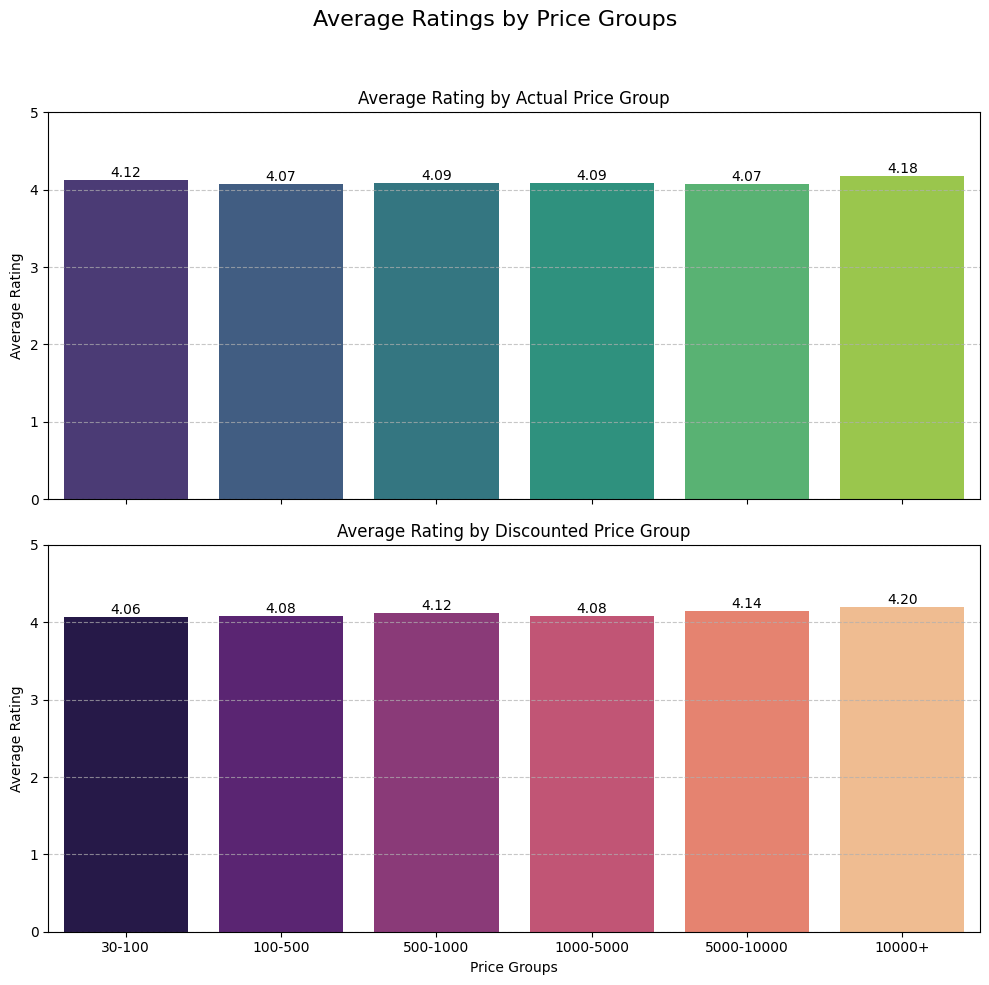

In [65]:
# Define price ranges for actual prices with new min and max
actual_price_bins = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]  # Custom bins for actual prices
actual_price_labels = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=actual_price_bins, labels=actual_price_labels)

# Calculate average ratings for actual price groups
average_rating_actual = df.groupby('actual_price_group')['rating'].mean().reset_index()
average_rating_actual.columns = ['Actual Price Group', 'Average Rating']

# Sort the actual price groups by average rating
average_rating_actual = average_rating_actual.sort_values(by='Average Rating', ascending=False)

# Define price ranges for discounted prices with new min and max
discounted_price_bins = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]  # Custom bins for discounted prices
discounted_price_labels = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=discounted_price_bins, labels=discounted_price_labels)

# Calculate average ratings for discounted price groups
average_rating_discounted = df.groupby('discounted_price_group')['rating'].mean().reset_index()
average_rating_discounted.columns = ['Discounted Price Group', 'Average Rating']

# Only keep groups that have a name
average_rating_discounted = average_rating_discounted[average_rating_discounted['Discounted Price Group'].notnull()]

# Set up the matplotlib figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Average Ratings by Price Groups', fontsize=16)

# Plot for Actual Price Groups
bar_actual = sns.barplot(ax=axes[0], x='Actual Price Group', y='Average Rating', data=average_rating_actual, palette='viridis')
axes[0].set_title('Average Rating by Actual Price Group')
axes[0].set_ylabel('Average Rating')
axes[0].set_ylim(0, 5)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations above bars for Actual Price Groups
for p in bar_actual.patches:
    axes[0].annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

# Plot for Discounted Price Groups
bar_discounted = sns.barplot(ax=axes[1], x='Discounted Price Group', y='Average Rating', data=average_rating_discounted, palette='magma')
axes[1].set_title('Average Rating by Discounted Price Group')
axes[1].set_ylabel('Average Rating')
axes[1].set_ylim(0, 5)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations above bars for Discounted Price Groups
for p in bar_discounted.patches:
    axes[1].annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

# Show the plot
plt.xlabel('Price Groups')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the Maximum Ratings Percentage by Actual Price</p>

In [66]:
# Define price ranges for actual price groups, excluding <25
price_bins_actual = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]  # Adjusted maximum price
price_labels_actual = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=price_bins_actual, labels=price_labels_actual)

# Calculate maximum ratings for actual price groups
total_ratings_actual = df.groupby('actual_price_group')['rating'].max().reset_index()
total_ratings_actual.columns = ['Actual Price Group', 'Max Ratings']  # Changed to Max Ratings

# Calculate the maximum of the Max Ratings to compute percentage
max_ratings_count = total_ratings_actual['Max Ratings'].max()

# Calculate percentage of maximum ratings for each group
total_ratings_actual['Percentage of Maximum Ratings (%)'] = (total_ratings_actual['Max Ratings'] / max_ratings_count) * 100

# Calculate the overall maximum rating across all groups
overall_max_rating = total_ratings_actual['Max Ratings'].max()

# Print the total ratings and percentages
print("\nTotal Ratings and Percentage of Maximum Ratings by Actual Price Group:")
print(total_ratings_actual)

# Print the overall maximum rating
print(f"\nOverall Maximum Rating across all groups: {overall_max_rating}")



Total Ratings and Percentage of Maximum Ratings by Actual Price Group:
  Actual Price Group  Max Ratings  Percentage of Maximum Ratings (%)
0             30-100          4.4                               88.0
1            100-500          4.8                               96.0
2           500-1000          5.0                              100.0
3          1000-5000          5.0                              100.0
4         5000-10000          4.6                               92.0
5             10000+          4.8                               96.0

Overall Maximum Rating across all groups: 5.0


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualze the the Maximum Ratings Percentage by Actual Price</p>

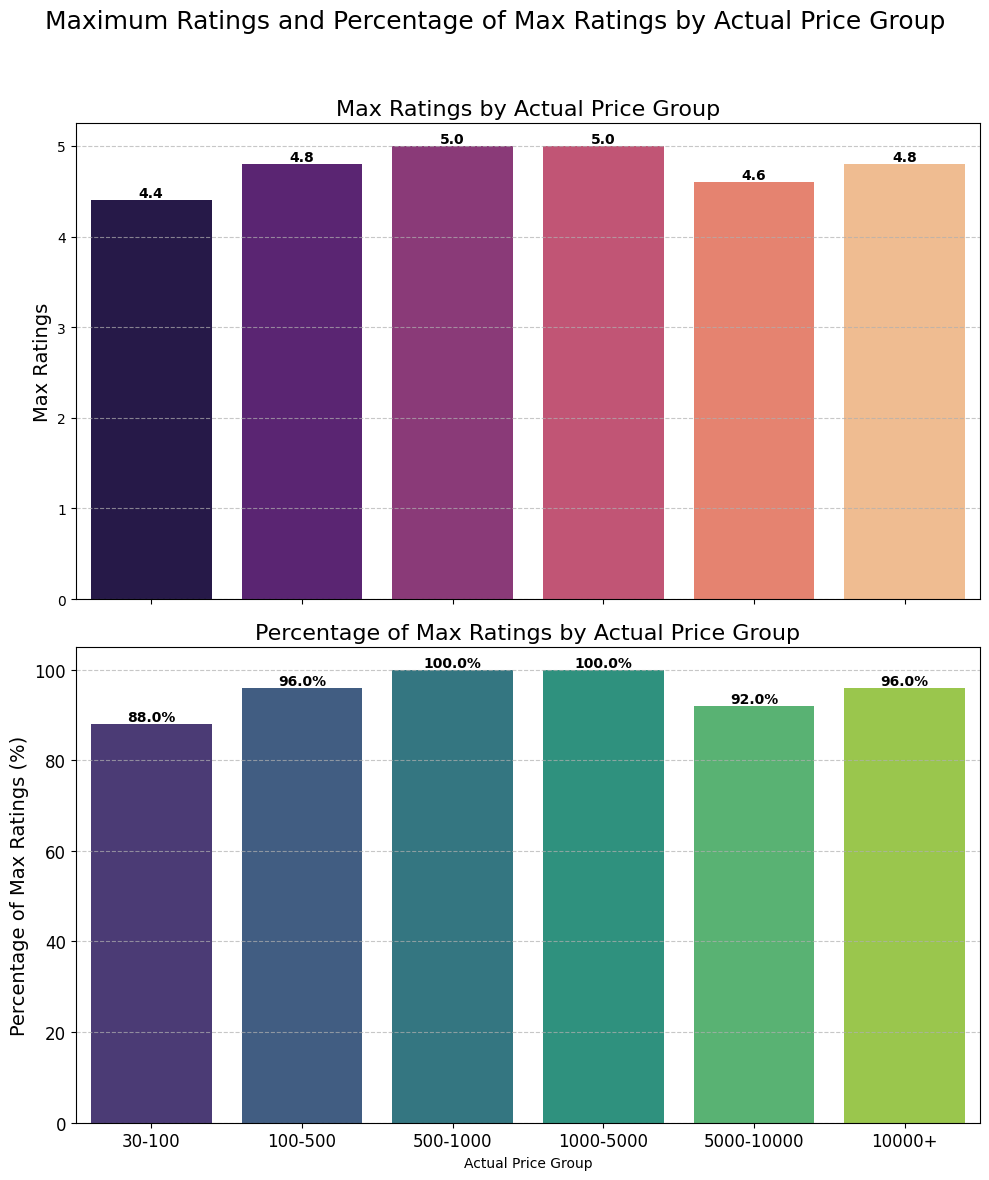

In [67]:
# Define price ranges for actual price groups
price_bins_actual = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]  # Adjusted maximum price
price_labels_actual = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=price_bins_actual, labels=price_labels_actual)

# Calculate maximum ratings for actual price groups
total_ratings_actual = df.groupby('actual_price_group')['rating'].max().reset_index()
total_ratings_actual.columns = ['Actual Price Group', 'Max Ratings']  # Updated column name to Max Ratings

# Calculate the maximum of the Max Ratings to compute percentage
max_ratings_count = total_ratings_actual['Max Ratings'].max()  # Correctly calculating the max ratings

# Calculate percentage of max ratings for each group
total_ratings_actual['Percentage of Max Ratings (%)'] = (total_ratings_actual['Max Ratings'] / max_ratings_count) * 100

# Set up the matplotlib figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
fig.suptitle('Maximum Ratings and Percentage of Max Ratings by Actual Price Group', fontsize=18)  # Updated title

# Plot for Max Ratings
bar_plot_max = sns.barplot(data=total_ratings_actual,
                            x='Actual Price Group',
                            y='Max Ratings',
                            palette='magma',
                            ax=axes[0])
axes[0].set_title('Max Ratings by Actual Price Group', fontsize=16)  # Updated title
axes[0].set_ylabel('Max Ratings', fontsize=14)

# Add value annotations above bars for Max Ratings
for p in bar_plot_max.patches:
    bar_plot_max.annotate(f'{p.get_height()}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom',
                          fontsize=10, fontweight='bold')

# Plot for Percentage of Max Ratings
bar_plot_percentage = sns.barplot(data=total_ratings_actual,
                                   x='Actual Price Group',
                                   y='Percentage of Max Ratings (%)',
                                   palette='viridis',
                                   ax=axes[1])
axes[1].set_title('Percentage of Max Ratings by Actual Price Group', fontsize=16)  # Updated title
axes[1].set_ylabel('Percentage of Max Ratings (%)', fontsize=14)

# Add value annotations above bars for Percentage of Max Ratings
for p in bar_plot_percentage.patches:
    bar_plot_percentage.annotate(f'{p.get_height():.1f}%',
                                 (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='bottom',
                                 fontsize=10, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show grid lines for better readability
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the the Maximum Ratings Percentage by Discounted Price</p>

In [68]:
# Define price ranges for discounted price groups, excluding <25
price_bins_discounted = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]
price_labels_discounted = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=price_bins_discounted, labels=price_labels_discounted)

# Calculate maximum ratings for discounted price groups
max_ratings_discounted = df.groupby('discounted_price_group')['rating'].max().reset_index()
max_ratings_discounted.columns = ['Discounted Price Group', 'Max Ratings']

# Calculate the maximum of the Max Ratings to compute percentage
total_max_ratings_count = max_ratings_discounted['Max Ratings'].max()

# Calculate percentage of max ratings for each group
max_ratings_discounted['Percentage of Max Ratings (%)'] = (max_ratings_discounted['Max Ratings'] / total_max_ratings_count) * 100

# Print the total ratings and percentages
print("\nMax Ratings and Percentage of Max Ratings by Discounted Price Group:")
print(max_ratings_discounted)



Max Ratings and Percentage of Max Ratings by Discounted Price Group:
  Discounted Price Group  Max Ratings  Percentage of Max Ratings (%)
0                 30-100          4.5                           90.0
1                100-500          5.0                          100.0
2               500-1000          4.7                           94.0
3              1000-5000          4.8                           96.0
4             5000-10000          4.6                           92.0
5                 10000+          4.7                           94.0


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualze the the Maximum Ratings Percentage by Discounted Price</p>

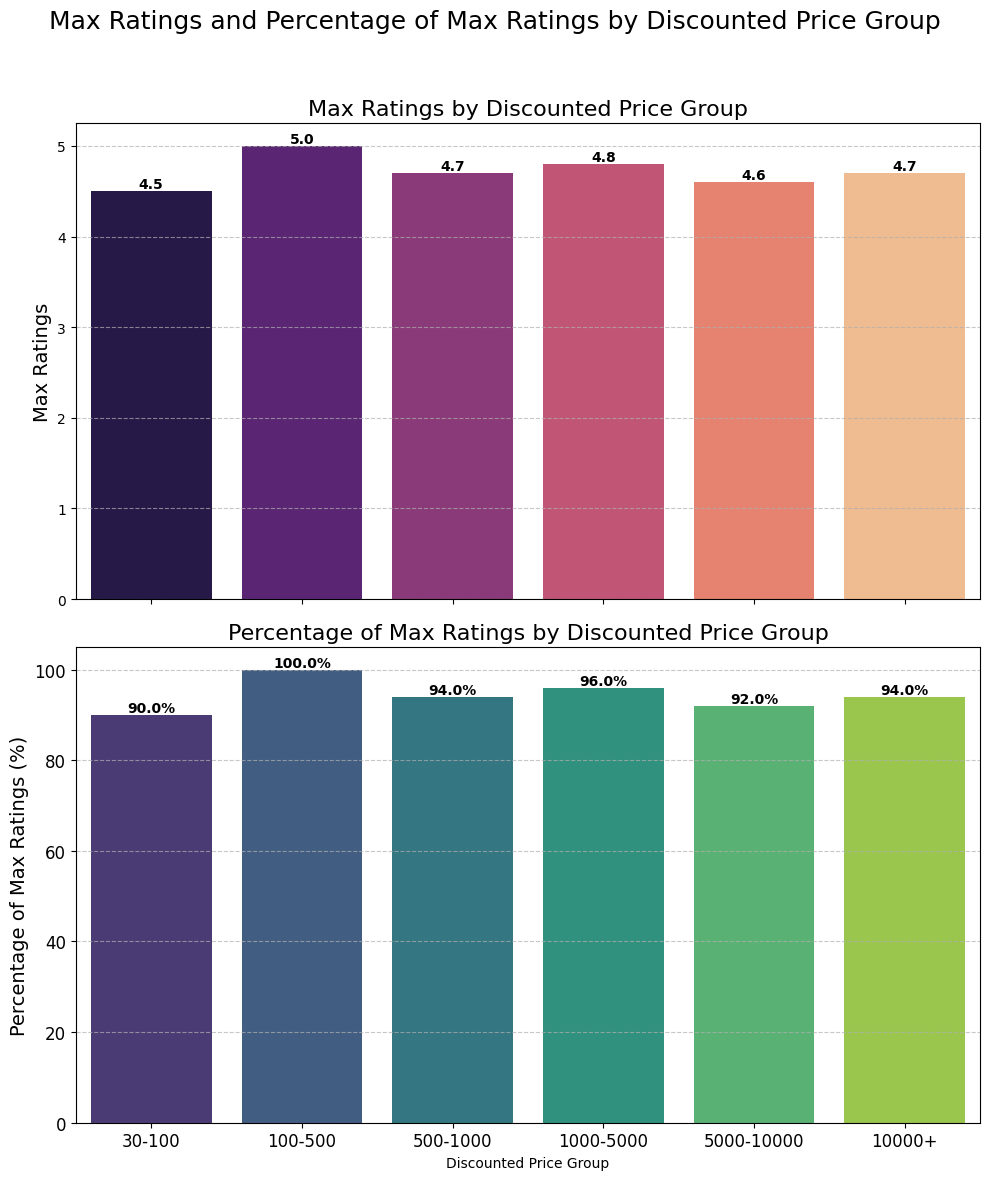

In [69]:
# Define price ranges for discounted price groups, excluding <25
price_bins_discounted = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]
price_labels_discounted = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=price_bins_discounted, labels=price_labels_discounted)

# Calculate maximum ratings for discounted price groups
max_ratings_discounted = df.groupby('discounted_price_group')['rating'].max().reset_index()
max_ratings_discounted.columns = ['Discounted Price Group', 'Max Ratings']

# Calculate total maximum ratings for percentage calculation
total_max_ratings_count = max_ratings_discounted['Max Ratings'].max()

# Calculate percentage of max ratings for each group
max_ratings_discounted['Percentage of Max Ratings (%)'] = (max_ratings_discounted['Max Ratings'] / total_max_ratings_count) * 100

# Set up the matplotlib figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
fig.suptitle('Max Ratings and Percentage of Max Ratings by Discounted Price Group', fontsize=18)

# Plot for Max Ratings
bar_plot_max = sns.barplot(data=max_ratings_discounted,
                            x='Discounted Price Group',
                            y='Max Ratings',
                            palette='magma',
                            ax=axes[0])
axes[0].set_title('Max Ratings by Discounted Price Group', fontsize=16)
axes[0].set_ylabel('Max Ratings', fontsize=14)

# Add value annotations above bars for Max Ratings
for p in bar_plot_max.patches:
    bar_plot_max.annotate(f'{p.get_height()}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom',
                          fontsize=10, fontweight='bold')

# Plot for Percentage of Max Ratings
bar_plot_percentage = sns.barplot(data=max_ratings_discounted,
                                   x='Discounted Price Group',
                                   y='Percentage of Max Ratings (%)',
                                   palette='viridis',
                                   ax=axes[1])
axes[1].set_title('Percentage of Max Ratings by Discounted Price Group', fontsize=16)
axes[1].set_ylabel('Percentage of Max Ratings (%)', fontsize=14)

# Add value annotations above bars for Percentage of Max Ratings
for p in bar_plot_percentage.patches:
    bar_plot_percentage.annotate(f'{p.get_height():.1f}%',
                                 (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='bottom',
                                 fontsize=10, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show grid lines for better readability
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the the Average Ratings by Actual and Discounted Price Percentage</p>

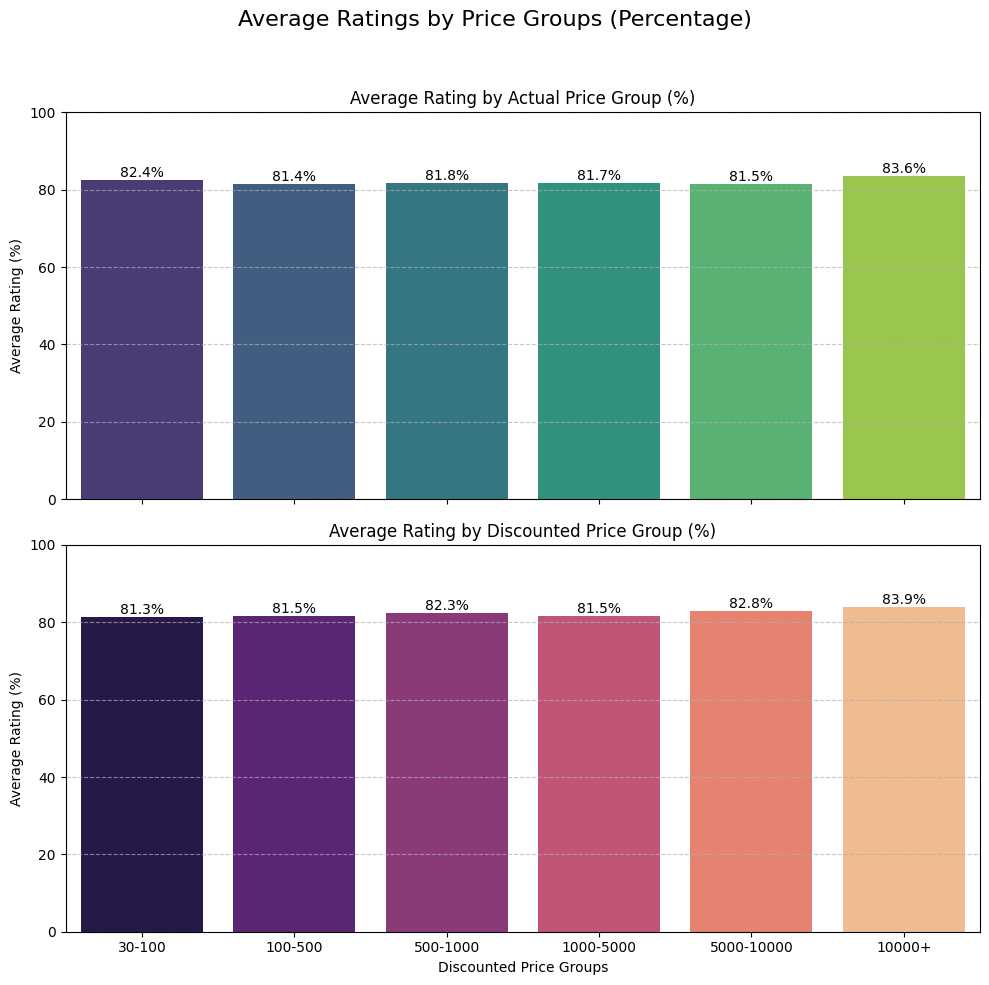

In [70]:
# Define price ranges for actual prices (excluding <20)
price_bins_actual = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]  # Start from 25
price_labels_actual = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=price_bins_actual, labels=price_labels_actual)

# Calculate average ratings for actual price groups
average_rating_actual = df.groupby('actual_price_group')['rating'].mean().reset_index()
average_rating_actual.columns = ['Actual Price Group', 'Average Rating']

# Convert average ratings to percentage
average_rating_actual['Average Rating (%)'] = (average_rating_actual['Average Rating'] / 5) * 100

# Sort and get the top 10 actual price groups
average_rating_actual = average_rating_actual.sort_values(by='Average Rating', ascending=False)

# Calculate average ratings for discounted price groups, excluding <25
price_bins_discounted = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]  # Start from 25
price_labels_discounted = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=price_bins_discounted, labels=price_labels_discounted)

average_rating_discounted = df.groupby('discounted_price_group')['rating'].mean().reset_index()
average_rating_discounted.columns = ['Discounted Price Group', 'Average Rating']

# Only keep groups that have a name
average_rating_discounted = average_rating_discounted[average_rating_discounted['Discounted Price Group'].notnull()]

# Convert average ratings to percentage for discounted price groups
average_rating_discounted['Average Rating (%)'] = (average_rating_discounted['Average Rating'] / 5) * 100

# Set up the matplotlib figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Average Ratings by Price Groups (Percentage)', fontsize=16)

# Plot for Actual Price Groups
bar_actual = sns.barplot(ax=axes[0], x='Actual Price Group', y='Average Rating (%)', data=average_rating_actual, palette='viridis')
axes[0].set_title('Average Rating by Actual Price Group (%)')
axes[0].set_ylabel('Average Rating (%)')
axes[0].set_ylim(0, 100)  # Adjust y-limit for percentage
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations above bars for Actual Price Groups
for p in bar_actual.patches:
    axes[0].annotate(f'{p.get_height():.1f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

# Plot for Discounted Price Groups
bar_discounted = sns.barplot(ax=axes[1], x='Discounted Price Group', y='Average Rating (%)', data=average_rating_discounted, palette='magma')
axes[1].set_title('Average Rating by Discounted Price Group (%)')
axes[1].set_ylabel('Average Rating (%)')
axes[1].set_ylim(0, 100)  # Adjust y-limit for percentage
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations above bars for Discounted Price Groups
for p in bar_discounted.patches:
    axes[1].annotate(f'{p.get_height():.1f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

# Show the plot
plt.xlabel('Discounted Price Groups')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the the Maximum Ratings by Actual and Discounted Price Percentage</p>

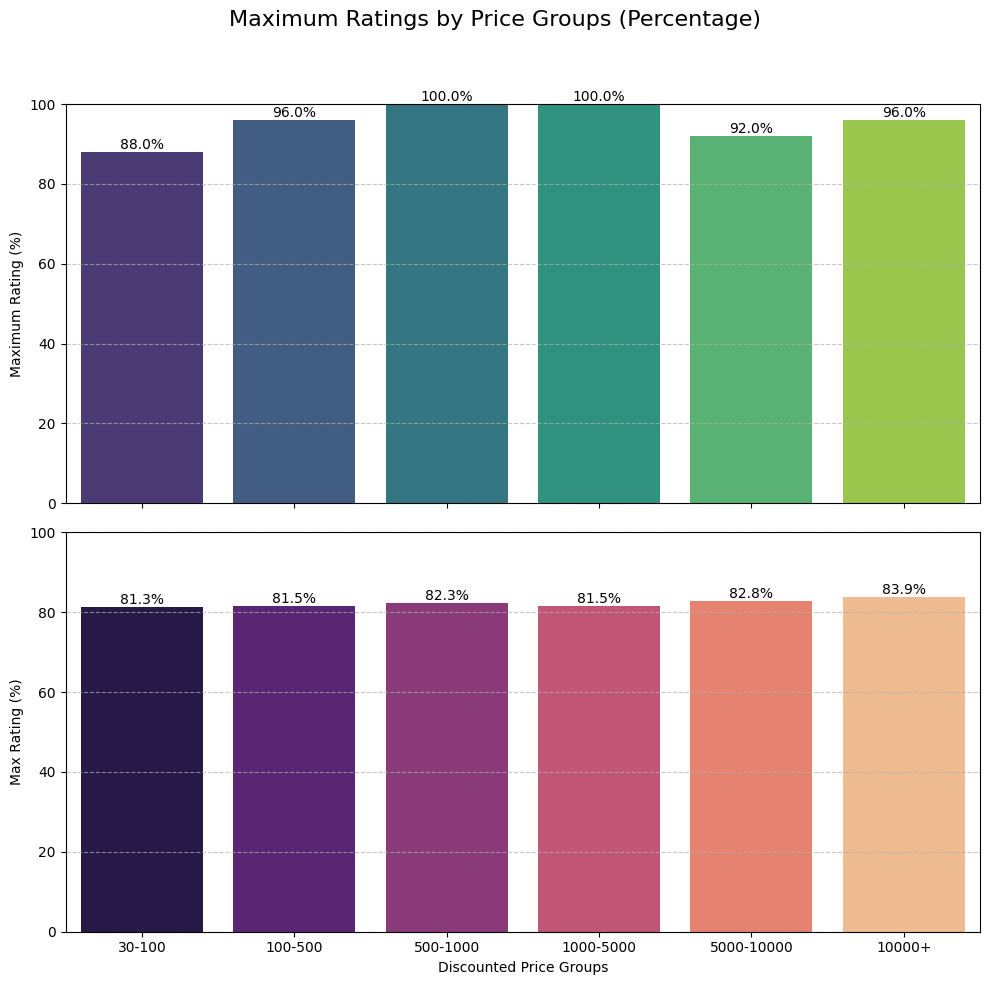

In [71]:
# Define price ranges for actual prices (excluding <20)
price_bins_actual = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]  # Start from 30
price_labels_actual = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=price_bins_actual, labels=price_labels_actual)

# Calculate maximum ratings for actual price groups
max_rating_actual = df.groupby('actual_price_group')['rating'].max().reset_index()
max_rating_actual.columns = ['Actual Price Group', 'Maximum Rating']

# Convert maximum ratings to percentage
max_rating_actual['Max Rating (%)'] = (max_rating_actual['Maximum Rating'] / 5) * 100

# Sort and get the maximum actual price groups
max_rating_actual = max_rating_actual.sort_values(by='Max Rating (%)', ascending=False)

# Calculate maximum ratings for discounted price groups, excluding <25
price_bins_discounted = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]  # Start from 30
price_labels_discounted = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=price_bins_discounted, labels=price_labels_discounted)

# Calculate maximum ratings for discounted price groups
max_rating_discounted = df.groupby('discounted_price_group')['rating'].mean().reset_index()
max_rating_discounted.columns = ['Discounted Price Group', 'Maximum Rating']

# Only keep groups that have a name
max_rating_discounted = max_rating_discounted[max_rating_discounted['Discounted Price Group'].notnull()]

# Convert maximum ratings to percentage for discounted price groups
max_rating_discounted['Max Rating (%)'] = (max_rating_discounted['Maximum Rating'] / 5) * 100

# Set up the matplotlib figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Maximum Ratings by Price Groups (Percentage)', fontsize=16)

# Plot for Actual Price Groups
bar_actual = sns.barplot(ax=axes[0], x='Actual Price Group', y='Max Rating (%)', data=max_rating_actual, palette='viridis')
axes[0].set_ylabel('Maximum Rating (%)')
axes[0].set_ylim(0, 100)  # Adjust y-limit for percentage
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations above bars for Actual Price Groups
for p in bar_actual.patches:
    axes[0].annotate(f'{p.get_height():.1f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

# Plot for Discounted Price Groups
bar_discounted = sns.barplot(ax=axes[1], x='Discounted Price Group', y='Max Rating (%)', data=max_rating_discounted, palette='magma')
axes[1].set_ylabel('Max Rating (%)')
axes[1].set_ylim(0, 100)  # Adjust y-limit for percentage
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations above bars for Discounted Price Groups
for p in bar_discounted.patches:
    axes[1].annotate(f'{p.get_height():.1f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

# Show the plot
plt.xlabel('Discounted Price Groups')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the Effect of Actual and Discounted Price on Ratings</p>

In [72]:
# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Actual Price vs Rating', 'Discounted Price vs Rating'))

# Define darker colors
actual_price_color = 'rgba(75, 0, 130, 0.8)'  # Darker Purple
discounted_price_color = 'rgba(255, 20, 147, 0.8)'  # Darker Pink

# Scatter plot for Actual Price vs Rating
fig.add_trace(
    go.Scatter(
        x=df['actual_price'],
        y=df['rating'],
        mode='markers',
        marker=dict(size=10, color=actual_price_color),
        name='Actual Price'
    ),
    row=1, col=1
)

# Scatter plot for Discounted Price vs Rating
fig.add_trace(
    go.Scatter(
        x=df['discounted_price'],
        y=df['rating'],
        mode='markers',
        marker=dict(size=10, color=discounted_price_color),
        name='Discounted Price'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text='Effect of Actual and Discounted Price on Ratings',
    height=500,
    width=1000,
    showlegend=True
)

# Update x-axis formatting to display original values
fig.update_xaxes(tickformat='f', row=1, col=1)  # For the actual price
fig.update_xaxes(tickformat='f', row=1, col=2)  # For the discounted price

# Update y-axis titles
fig.update_yaxes(title_text='Rating', row=1, col=1)
fig.update_yaxes(title_text='Rating', row=1, col=2)

# Show the plot
fig.show()


## **Observations:**
* According to this dataset, the actual maximum price of Amazon sales products is **139900.000000**, while the discounted price is **77990.000000**. The percentage discount on this Amazon sales product is approximately **44.26%**. Hence, the product is being sold at **44.26%** off its original price.
* The minimum actual and discounted price of Amazon sales products is **39.0**.
* According to this dataset, the maximum ratings of Amazon sales products is **5.0**.
* The correlation between actual price and rating is **0.121672970756719**.
* The correlation between discounted price and rating is **0.12035456289817406**.
* Actual price and ratings, discounted price and ratings have a positive but very low correlation, meaning that the actual price or the price after discounts on Amazon sales products does not greatly affect the ratings according to this dataset.
* The highest average rating of Amazon sales products is in the **10000+ actual products prices category** with a rating of **4.178836**.
* The lowest average rating of Amazon sales products is in the **100-500 actual products prices category** with a rating of **4.071359**.
* The highest average rating of Amazon sales products in the **10000+ discounted products prices category** is **4.195082**.
* The lowest rating of Amazon sales products in the **30-100 discounted products prices category** is **4.064444**.
* The maximum rating and maximum percentage rating in the **1000-5000 price range** category is **5** with a rating percentage of **100%** of actual price products.
* Similarly, the maximum rating and maximum percentage rating in the **500-1000 price range** category is **5** with a rating percentage of **100%** of actual price products.
* Amazon sales products in the **30-100 price range** have a less rating percentage of about **90.0%**, with a rating of **4.5** of actual price products.
* The discounted products in the **100-500 price range** have the highest rating percentage of about **100%** with a rating of **5.0** of discounted price products.
* The highest average rating of Amazon sales dataset is **83.6** of actual price products.

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the Top Products with Highest Average Rating</p>

In [73]:
# Step 1: Group by product_id and calculate average rating
avg_ratings = df.groupby('product_id')['rating'].mean()

# Step 2: Sort the average ratings in descending order and get the top 10
top_10_avg_ratings = avg_ratings.nlargest(10)

# Step 3: Get the product names for those product_ids
top_10_products = df[df['product_id'].isin(top_10_avg_ratings.index)]

# Step 4: Create a DataFrame for easier display
top_10_product_info = top_10_products[['product_id', 'product_name']].drop_duplicates().set_index('product_id')
top_10_product_info['average_rating'] = top_10_avg_ratings.values

# Display the results with specified wording
print("Top 10 Products with Highest Average Ratings:")
for product_id, row in top_10_product_info.iterrows():
    print(f"Product ID: {product_id} - Product Name: {row['product_name']} - Average Rating: {row['average_rating']:.1f}")

# Print Product IDs and their Average Ratings separately
print("\nProduct IDs and Their Average Ratings:")
for product_id in top_10_product_info.index:
    avg_rating = top_10_product_info.loc[product_id, 'average_rating']
    print(f"Product ID: {product_id} - Average Rating: {avg_rating:.1f}")


Top 10 Products with Highest Average Ratings:
Product ID: B0BP7XLX48 - Product Name: Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White) - Average Rating: 5.0
Product ID: B09WN3SRC7 - Product Name: Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black) - Average Rating: 5.0
Product ID: B0BQRJ3C47 - Product Name: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White - Average Rating: 5.0
Product ID: B0B23LW7NV - Product Name: Spigen EZ Fit Tempered Glass Screen Protector for iPhone 14 Pro Max - 2 Pack (Sensor Protection) - Average Rating: 4.8
Product ID: B09ZHCJDP1 - Product Name: Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous 

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the Top Products with Highest Average Rating</p>

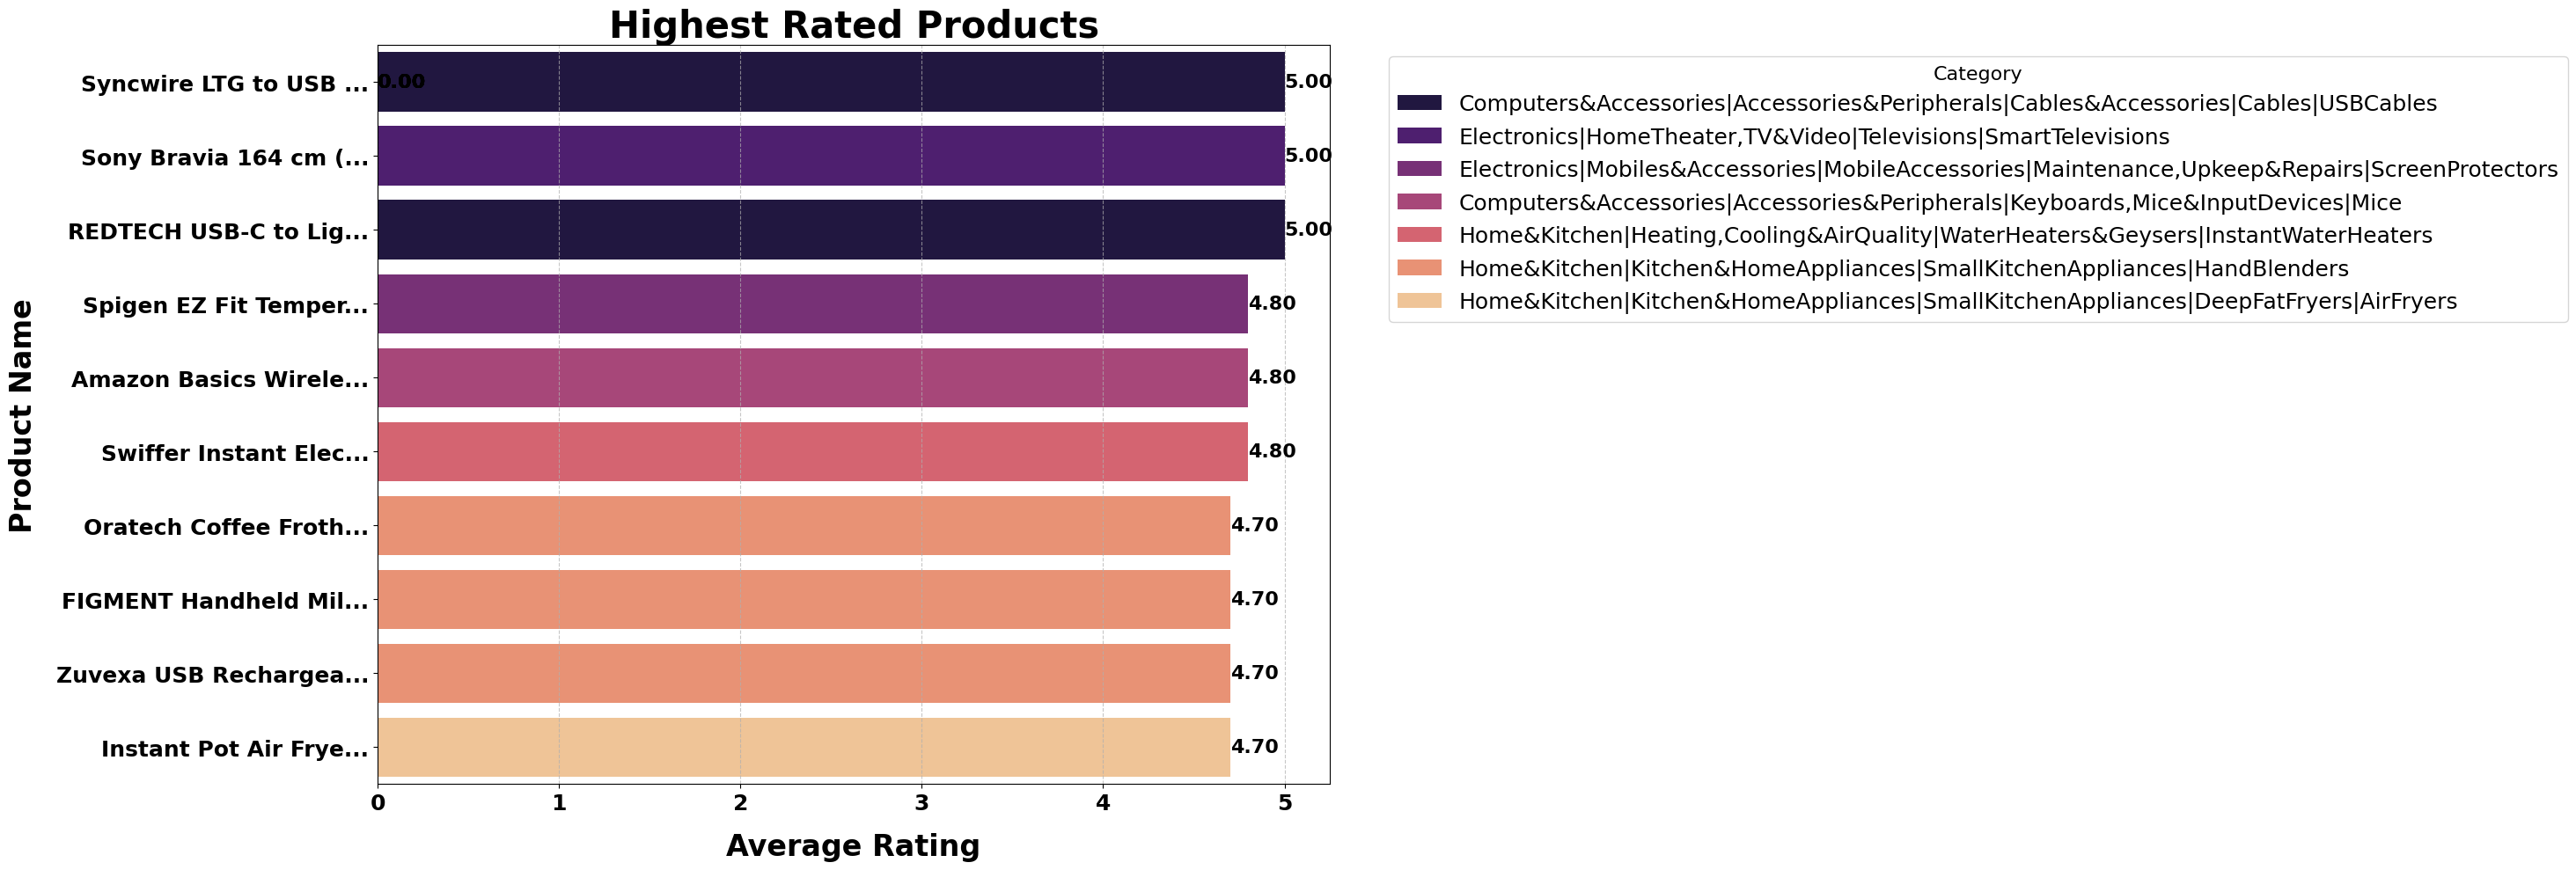

In [74]:
# Step 1: Group by product_id and calculate average rating
avg_ratings = df.groupby('product_id')['rating'].mean()

# Step 2: Sort the average ratings in descending order and get the top 10
top_10_avg_ratings = avg_ratings.nlargest(10)

# Step 3: Get the product names for those product_ids
top_10_products = df[df['product_id'].isin(top_10_avg_ratings.index)]

# Step 4: Create a DataFrame for easier display
top_10_product_info = top_10_products[['category', 'product_id', 'product_name', 'rating']].drop_duplicates().set_index('product_id')
top_10_product_info['average_rating'] = top_10_avg_ratings.values

# Create a new DataFrame for the plot
top_10_product_info['short_product_name'] = top_10_product_info['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

# Set the aesthetics for the plot with an increased size
plt.figure(figsize=(30, 10))  # Increased figure size

# Create a color palette based on the unique categories
unique_categories = top_10_product_info['category'].unique()
palette = sns.color_palette("magma", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))

# Create a horizontal bar plot with stacked bars
barplot = sns.barplot(data=top_10_product_info, y='short_product_name', x='average_rating', hue='category', dodge=False, palette=category_color_map)

# Add titles and labels with enhanced prominence
plt.title('Highest Rated Products', fontsize=30, fontweight='bold')  # Increased title font size
plt.xlabel('Average Rating', fontsize=24, fontweight='bold', labelpad=15)  # Increased xlabel font size
plt.ylabel('Product Name', fontsize=24, fontweight='bold', labelpad=15)  # Increased ylabel font size

# Adjust legend size and position
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=16)  # Increased legend font sizes

# Make ticks more prominent
plt.xticks(fontsize=18, fontweight='bold')  # Increased x-ticks font size
plt.yticks(fontsize=18, fontweight='bold')  # Increased y-ticks font size

# Add value labels to each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.2f}',
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='left', va='center',
                     fontsize=16, fontweight='bold', color='black')  # Increased annotation font size

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the Products with Least Average Rating</p>

In [75]:
# Step 1: Group by product_id and calculate average rating
avg_ratings = df.groupby('product_id')['rating'].mean()

# Step 2: Sort the average ratings in ascending order and get the bottom 10
least_10_avg_ratings = avg_ratings.nsmallest(10)

# Step 3: Get the product names for those product_ids
least_10_products = df[df['product_id'].isin(least_10_avg_ratings.index)]

# Step 4: Create a DataFrame for easier display
least_10_product_info = least_10_products[['product_id', 'product_name']].drop_duplicates().set_index('product_id')
least_10_product_info['average_rating'] = least_10_avg_ratings.values

# Display the results with specified wording
print("Least Rated 10 Products:")
for product_id, row in least_10_product_info.iterrows():
    print(f"Product ID: {product_id} - Product Name: {row['product_name']} - Average Rating: {row['average_rating']:.1f}")

# Print Product IDs and their Average Ratings separately
print("\nProduct IDs and Their Average Ratings:")
for product_id in least_10_product_info.index:
    avg_rating = least_10_product_info.loc[product_id, 'average_rating']
    print(f"Product ID: {product_id} - Average Rating: {avg_rating:.1f}")


Least Rated 10 Products:
Product ID: B09F6D21BY - Product Name: 7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys - Average Rating: 2.0
Product ID: B0B94JPY2N - Product Name: Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black) - Average Rating: 2.3
Product ID: B0BBVKRP7B - Product Name: SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black) - Average Rating: 2.6
Product ID: B0B82YGCF6 - Product Name: Tokdis MX-1 Pro Bluetooth Calling Smartwatch - 1.69” LCD Display, Multiple Watch Faces, Sleep Monitor, Heart & SpO2 Monitoring, Multiple Sports Modes, Water Resistant - Average Rating: 2.8
Product ID: B0BFBNXS94 - Product Name: Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the Products with Least Average Rating</p>

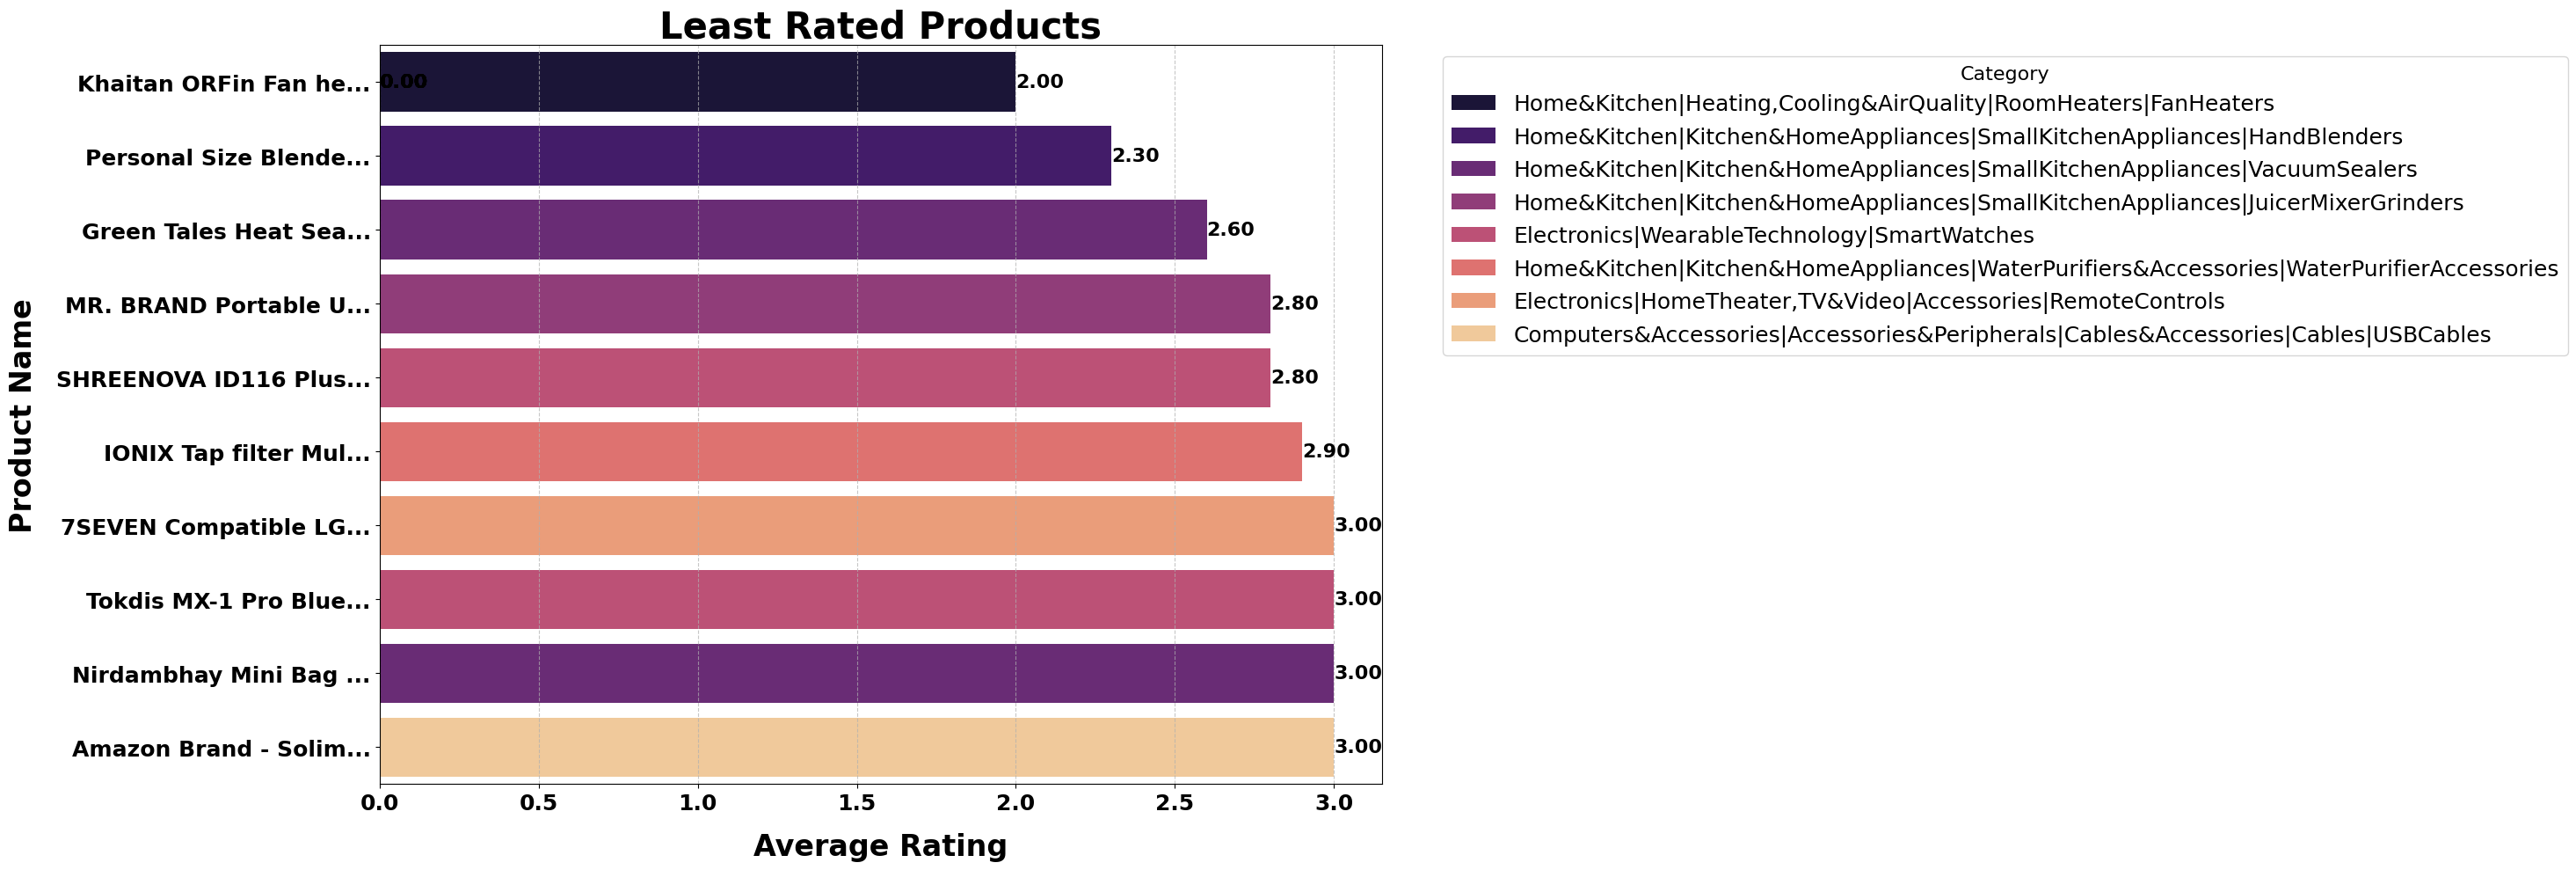

In [76]:
# Identify products with the least rating overall
least_rated_products = df.sort_values(by='rating').head(10)

# Select relevant columns
least_rated_products = least_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Create a new DataFrame for the plot
least_rated_products['short_product_name'] = least_rated_products['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

# Set the aesthetics for the plot with an increased size
plt.figure(figsize=(30, 10))  # Increased figure size

# Create a color palette based on the unique categories
unique_categories = least_rated_products['category'].unique()
palette = sns.color_palette("magma", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))

# Create a horizontal bar plot with stacked bars
barplot = sns.barplot(data=least_rated_products, y='short_product_name', x='rating', hue='category', dodge=False, palette=category_color_map)

# Add titles and labels with enhanced prominence
plt.title('Least Rated Products', fontsize=30, fontweight='bold')  # Increased title font size
plt.xlabel('Average Rating', fontsize=24, fontweight='bold', labelpad=15)  # Increased xlabel font size
plt.ylabel('Product Name', fontsize=24, fontweight='bold', labelpad=15)  # Increased ylabel font size

# Adjust legend size and position
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=16)  # Increased legend font sizes

# Make ticks more prominent
plt.xticks(fontsize=18, fontweight='bold')  # Increased x-ticks font size
plt.yticks(fontsize=18, fontweight='bold')  # Increased y-ticks font size

# Add value labels to each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.2f}',
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='left', va='center',
                     fontsize=16, fontweight='bold', color='black')  # Increased annotation font size

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Pearson Correlation</p>

In [77]:
# Select numerical columns for correlation
numerical_columns = [
    'discounted_price',
    'actual_price',
    'discount_percentage',
    'rating',
    'rating_count'
]

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr(method='pearson')  # You can also use 'kendall' or 'spearman'

# Display the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix



Correlation Matrix:


discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961915            -0.242412   
actual_price                 0.961915      1.000000            -0.118098   
discount_percentage         -0.242412     -0.118098             1.000000   
rating                       0.120355      0.121673            -0.155065   
rating_count                -0.027095     -0.035974             0.011127   

                       rating  rating_count  
discounted_price     0.120355     -0.027095  
actual_price         0.121673     -0.035974  
discount_percentage -0.155065      0.011127  
rating               1.000000      0.102148  
rating_count         0.102148      1.000000

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Correlation Analysis</p>

In [78]:
# Select numerical columns for correlation analysis
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
correlation_matrix = df[numerical_cols].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix



Correlation Matrix:


discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961915            -0.242412   
actual_price                 0.961915      1.000000            -0.118098   
discount_percentage         -0.242412     -0.118098             1.000000   
rating                       0.120355      0.121673            -0.155065   
rating_count                -0.027095     -0.035974             0.011127   

                       rating  rating_count  
discounted_price     0.120355     -0.027095  
actual_price         0.121673     -0.035974  
discount_percentage -0.155065      0.011127  
rating               1.000000      0.102148  
rating_count         0.102148      1.000000

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Correlation HeatMaps</p>

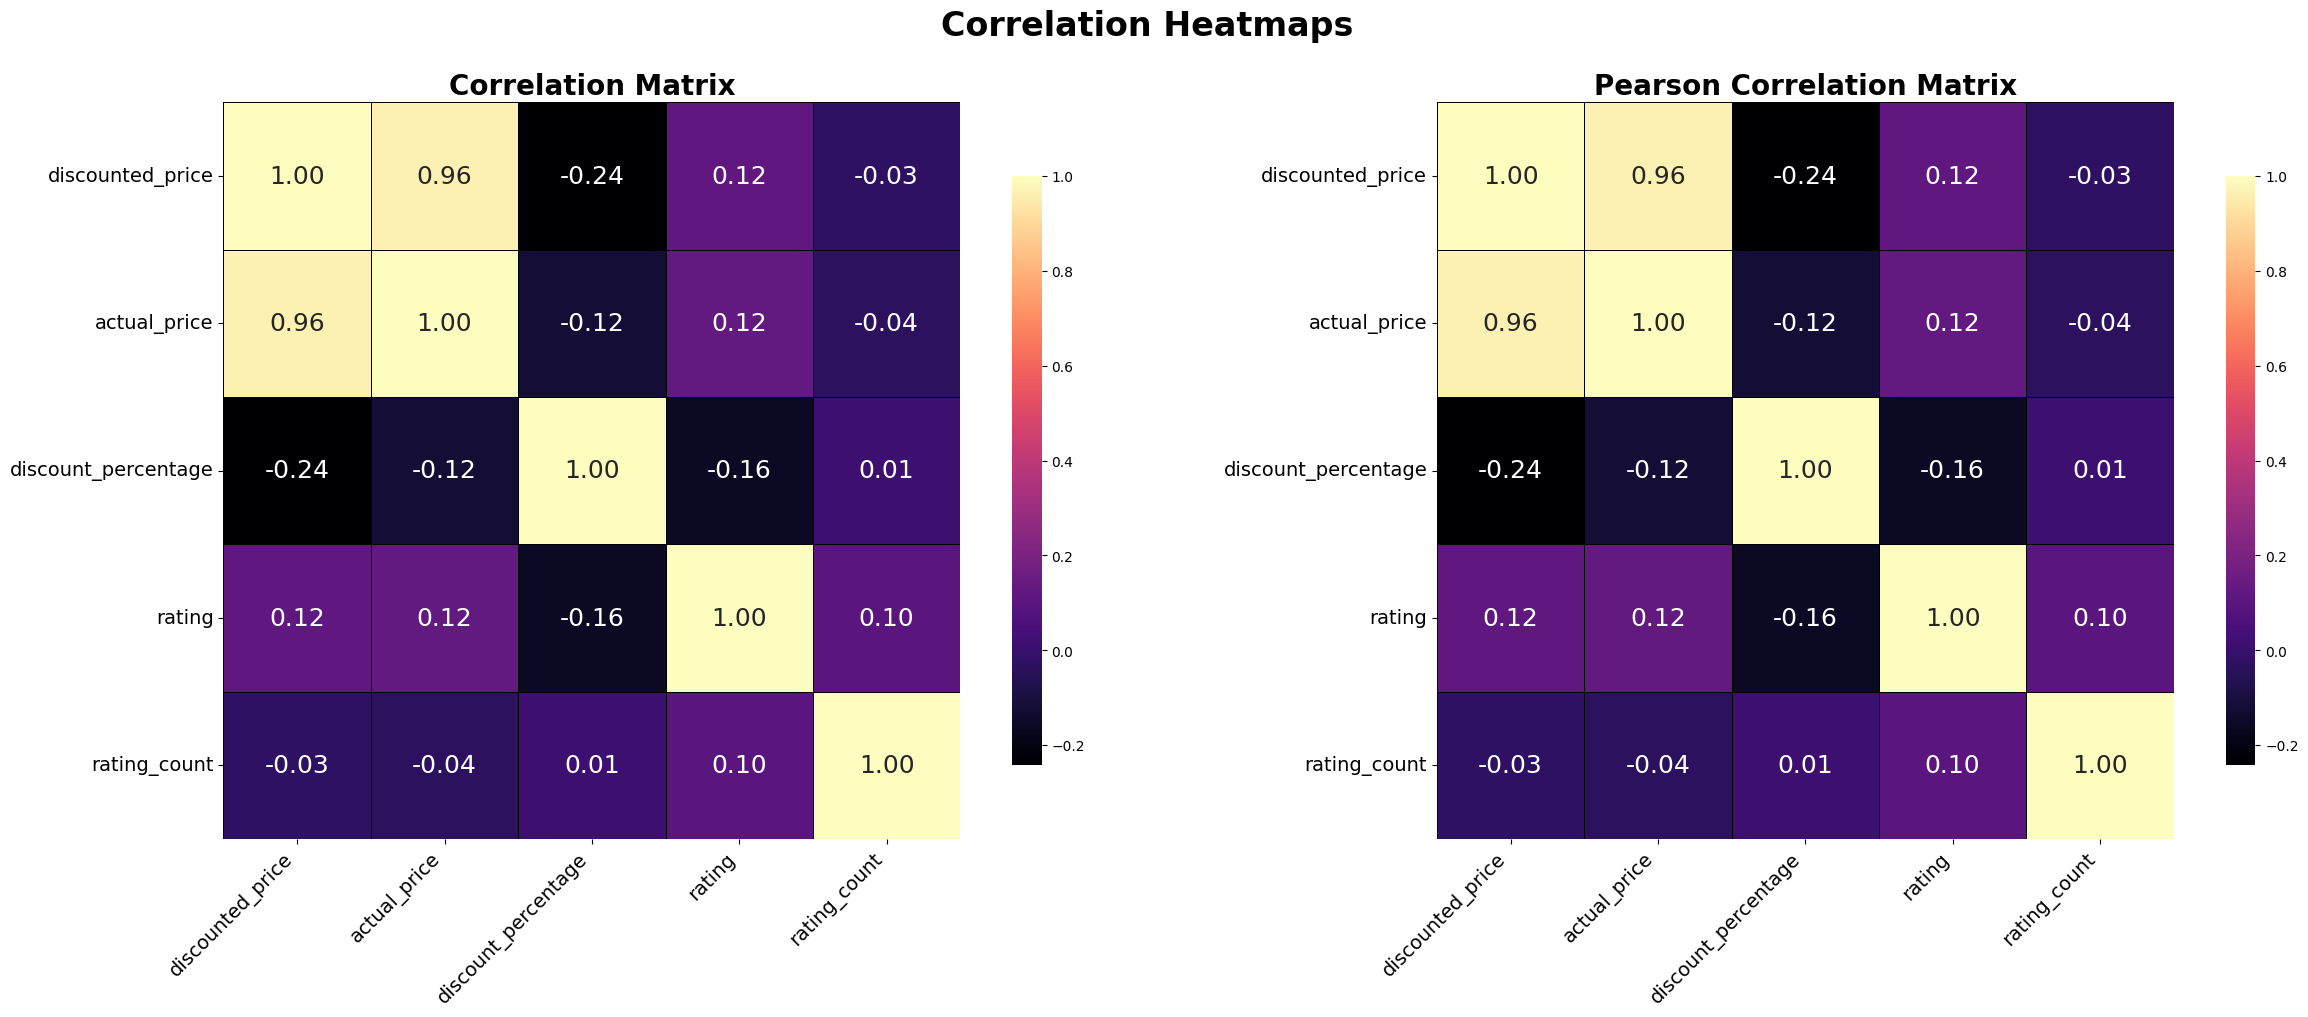

In [79]:
# Select numerical columns for correlation analysis
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
correlation_matrix = df[numerical_cols].corr()

# Set up the matplotlib figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle('Correlation Heatmaps', fontsize=24, fontweight='bold')  # Larger title

# Create heatmap for the general correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='magma', square=True,
            annot_kws={"size": 18},  # Increased annotation font size
            cbar_kws={"shrink": .8}, ax=axes[0], linewidths=0.5, linecolor='black')
axes[0].set_title('Correlation Matrix', fontsize=20, fontweight='bold')  # Prominent title
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=14)

# Create heatmap for the Pearson correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='magma', square=True,
            annot_kws={"size": 18},  # Increased annotation font size
            cbar_kws={"shrink": .8}, ax=axes[1], linewidths=0.5, linecolor='black')
axes[1].set_title("Pearson Correlation Matrix", fontsize=20, fontweight='bold')  # Prominent title
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=14)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


## **Observations:**
* `The highest average rating according to this dataset is 5.0.`
* `According to this dataset, the product with the highest average rating is Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type-C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop, with the product ID B09ZHCJDP1.`
* `Similarly, the product Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black) also has the highest average rating of about 5.0, with the product ID B09WN3SRC7.`
* `And the product REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type-C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White also has the highest average rating of about 5.0, with the product ID B0BQRJ3C47.`
* `According to this dataset, the least rated product is 7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart TV Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys, with an average rating of about 2.0 and product ID B09F6D21BY.`
* `According to this dataset, there is a very strong correlation between the actual price and the discounted price (positively correlated) of about 0.961915 correlation value according to Pearson and simple correlation.`
* `There is a positive but very low correlation between the actual price and rating, discounted price and ratings. The correlation value of actual price and ratings is 0.121673, while the correlation value of discounted price and ratings is 0.120355. This indicates that an increase or decrease in actual and discounted price has no significant effect on the ratings of Amazon products.`
* `Similarly, the rating count has very low or no correlation with actual price and discounted price as they are negatively correlated. The correlation value of discounted price and rating count is -0.027095, while the correlation value of actual price and rating count is -0.035974.`


In [80]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Sentiment Analysis</p>

In [81]:
# Function to classify sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    # Polarity ranges from -1 (negative) to 1 (positive)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Assuming 'review_content' contains the product reviews
# Apply the sentiment function to the 'review_content' column
df['sentiment'] = df['review_content'].apply(get_sentiment)

# Optional: Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Function to get top n words
def get_top_words(reviews, n=10):
    # Tokenize and clean the words
    words = re.findall(r'\w+', reviews.lower())  # Extract words and convert to lowercase
    # Count word frequencies
    word_counts = Counter(words)
    # Get the most common n words
    return word_counts.most_common(n)

# Print the top 10 words associated with each sentiment category
positive_words = ' '.join(df[df['sentiment'] == 'Positive']['review_content'])
negative_words = ' '.join(df[df['sentiment'] == 'Negative']['review_content'])
neutral_words = ' '.join(df[df['sentiment'] == 'Neutral']['review_content'])

print("\nTop 10 Positive Words:")
print(get_top_words(positive_words, 20))

print("\nTop 10 Negative Words:")
print(get_top_words(negative_words, 20))

print("\nTop 10 Neutral Words:")
print(get_top_words(neutral_words, 20))


sentiment
Positive    1438
Negative      26
Neutral        1
Name: count, dtype: int64

Top 10 Positive Words:
[('the', 13797), ('is', 9807), ('it', 9556), ('and', 9360), ('to', 7770), ('i', 7363), ('for', 6551), ('good', 6421), ('a', 6126), ('this', 4893), ('of', 4515), ('in', 4130), ('product', 3902), ('but', 3567), ('not', 3373), ('with', 3273), ('you', 2838), ('very', 2526), ('on', 2419), ('quality', 2400)]

Top 10 Negative Words:
[('the', 113), ('it', 106), ('is', 103), ('and', 93), ('to', 88), ('i', 73), ('not', 51), ('product', 44), ('but', 40), ('you', 39), ('in', 34), ('good', 33), ('for', 31), ('of', 29), ('this', 26), ('very', 23), ('like', 23), ('my', 21), ('on', 19), ('time', 19)]

Top 10 Neutral Words:
[('small', 2), ('okay', 2), ('is', 2), ('pages', 1), ('are', 1), ('best', 1), ('product', 1), ('but', 1), ('size', 1), ('too', 1), ('quality', 1), ('goodgreat', 1), ('notebook', 1), ('beast', 1), ('paper', 1), ('and', 1), ('spring', 1), ('good', 1), ('https', 1), ('m', 1)]


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the positive, Negative and Neutral Sentiments</p>

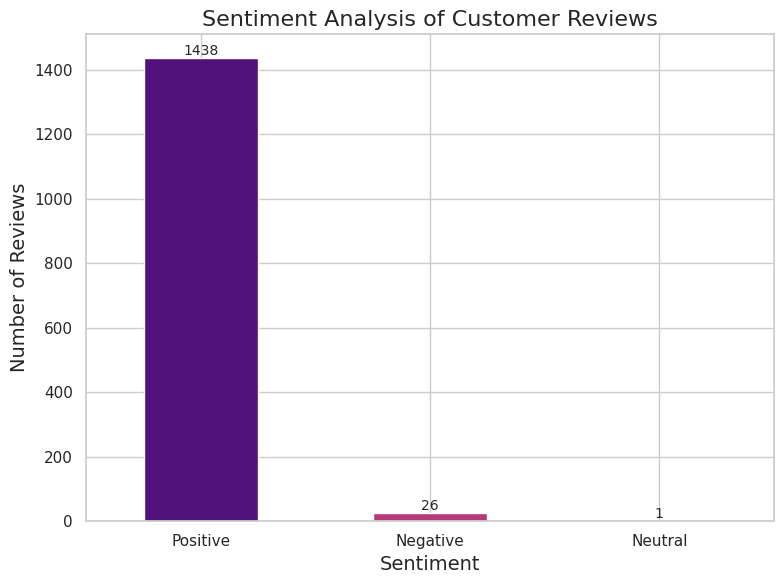

In [82]:
# Sample sentiment counts data (replace this with your actual sentiment_counts data)
sentiment_counts = pd.Series({'Positive': 1438, 'Negative': 26, 'Neutral': 1})

# Set the seaborn style and palette
sns.set(style='whitegrid')
palette = sns.color_palette("magma", n_colors=len(sentiment_counts))

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = sentiment_counts.plot(kind='bar', color=palette)

# Add titles and labels
plt.title('Sentiment Analysis of Customer Reviews', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=0)

# Add values above the bars
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),  # Display the integer value
        ha='center',
        va='bottom',  # Position above the bar
        fontsize=10
    )

# Show the plot
plt.tight_layout()
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Visualize the wordcloud of Sentiments</p>

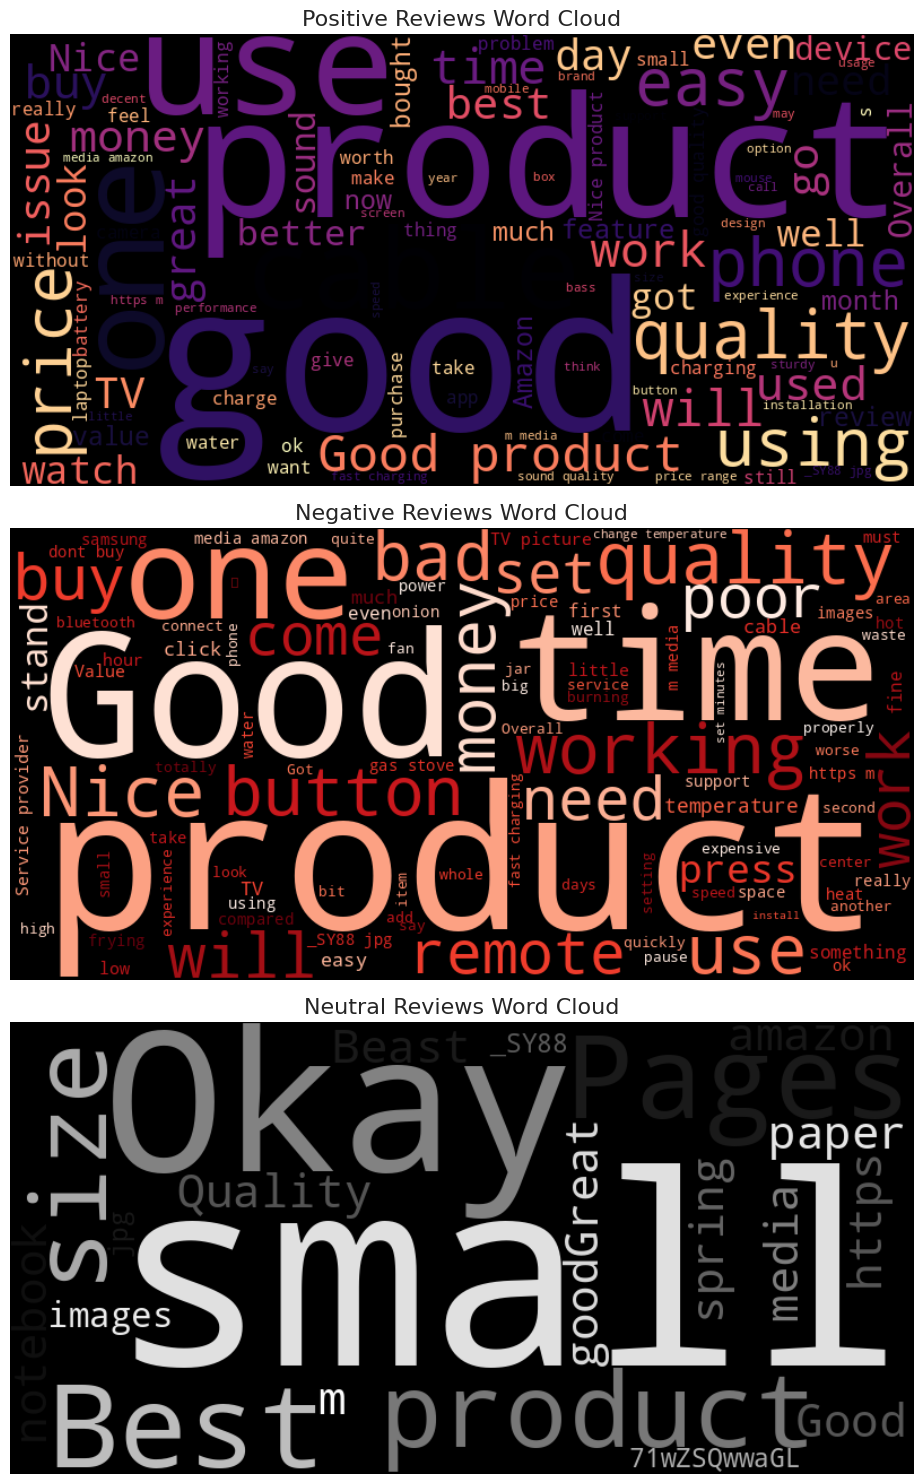

In [83]:
# Function to classify sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
# Assuming 'review_content' contains the product reviews
# Apply the sentiment function to the 'review_content' column
df['sentiment'] = df['review_content'].apply(get_sentiment)

# Create word clouds for each sentiment category
positive_reviews = ' '.join(df[df['sentiment'] == 'Positive']['review_content'].astype(str))
negative_reviews = ' '.join(df[df['sentiment'] == 'Negative']['review_content'].astype(str))
neutral_reviews = ' '.join(df[df['sentiment'] == 'Neutral']['review_content'].astype(str))

# Generate word clouds with improved visibility settings
wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='magma',  # Change to a more contrasting colormap
    max_words=100,
    min_font_size=10,
    contour_color='white',
    contour_width=1
).generate(positive_reviews)

wordcloud_negative = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Reds',  # Change to a contrasting colormap
    max_words=100,
    min_font_size=10,
    contour_color='white',
    contour_width=1
).generate(negative_reviews)

wordcloud_neutral = WordCloud(
    width=800,
    height=400,
    colormap='Greys',  # Change to a contrasting colormap
    max_words=100,
    min_font_size=10,
    contour_color='white',
    contour_width=1
).generate(neutral_reviews)

# Create subplots (vertical layout)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # 3 rows, 1 column

# Plot the word clouds
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].axis('off')  # Hide axes
axes[0].set_title('Positive Reviews Word Cloud', fontsize=16)

axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].axis('off')  # Hide axes
axes[1].set_title('Negative Reviews Word Cloud', fontsize=16)

axes[2].imshow(wordcloud_neutral, interpolation='bilinear')
axes[2].axis('off')  # Hide axes
axes[2].set_title('Neutral Reviews Word Cloud', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the Sentiments Percentages</p>

In [84]:
# Function to get the sentiment polarity
def get_sentiment(review):
    return TextBlob(review).sentiment.polarity

# Apply the function to the review content
df['sentiment'] = df['review_content'].apply(get_sentiment)

# Classify sentiment
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Summarize the results
sentiment_summary = df['sentiment_label'].value_counts(normalize=True) * 100

# Display the results with percentages
print("Sentiment Label Percentage (Percentage of Reviews):")
for label, percentage in sentiment_summary.items():
    print(f"{label}: {percentage:.2f}%")

# Visualize the sentiment distribution with updated title
fig = px.pie(sentiment_summary, values=sentiment_summary.values, names=sentiment_summary.index,
             title='Sentiment Label Percentage of Customer Reviews')  # Updated title
fig.show()


Sentiment Label Percentage (Percentage of Reviews):
Positive: 98.16%
Negative: 1.77%
Neutral: 0.07%


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Analyze the Average Ratings by Sentiments</p>

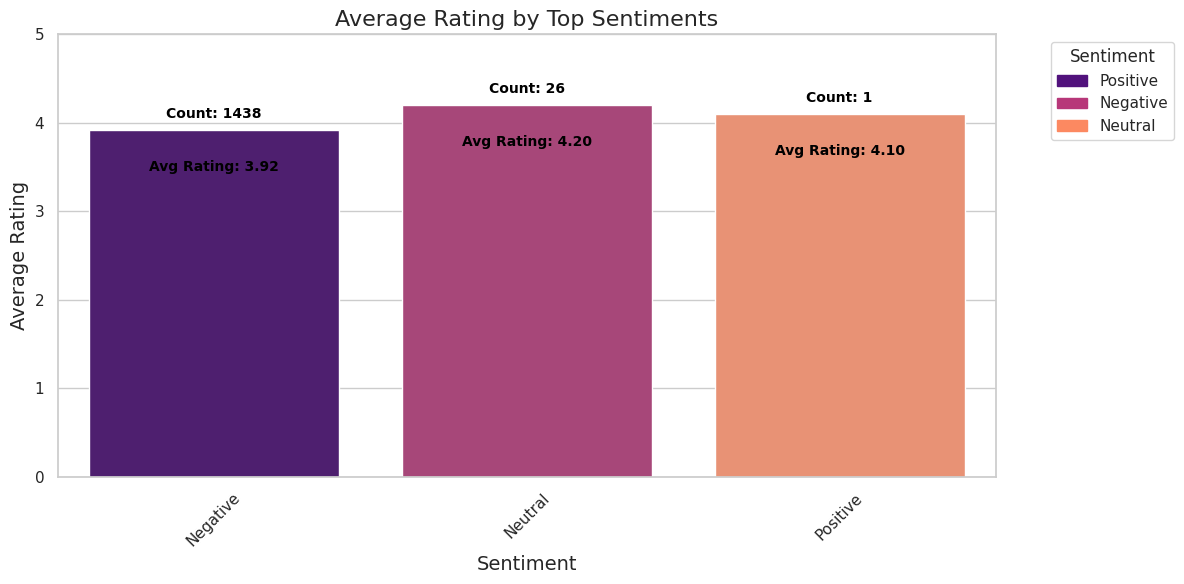

In [85]:
# Calculate sentiment counts
sentiment_counts = df['sentiment_label'].value_counts()

# Get top 10 sentiments
top_sentiments = sentiment_counts.nlargest(10).index.tolist()

# Filter the DataFrame to include only top sentiments
df_top_sentiments = df[df['sentiment_label'].isin(top_sentiments)]

# Calculate average rating by top sentiments
average_rating_by_sentiment = df_top_sentiments.groupby('sentiment_label')['rating'].mean().reset_index()

# Calculate counts of each sentiment for annotation
average_rating_by_sentiment['count'] = df_top_sentiments['sentiment_label'].value_counts().values

# Set the aesthetics for the plot
sns.set(style='whitegrid')

# Create a color palette
palette = sns.color_palette("magma", len(top_sentiments))

# Create a bar plot for average rating by sentiment
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=average_rating_by_sentiment, x='sentiment_label', y='rating', palette=palette)

# Annotate the counts and ratings on top of the bars
for index, p in enumerate(bar_plot.patches):
    rating = p.get_height()
    count = average_rating_by_sentiment['count'].iloc[index]
    bar_plot.annotate(f'Count: {count}',
                      (p.get_x() + p.get_width() / 2., p.get_height() + 0.1),
                      ha='center', va='bottom', fontsize=10, color='black', weight='bold')
    bar_plot.annotate(f'Avg Rating: {rating:.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height() - 0.5),
                      ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Add a legend for sentiments with corresponding colors
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(top_sentiments))]
labels = top_sentiments
plt.legend(handles, labels, title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set plot title and labels
plt.title('Average Rating by Top Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 5)

# Show the plot
plt.tight_layout()
plt.show()


In [86]:
# Calculate sentiment counts
sentiment_counts = df['sentiment_label'].value_counts()

# Get top 10 sentiments
top_sentiments = sentiment_counts.nlargest(10).index.tolist()

# Filter the DataFrame to include only top sentiments
df_top_sentiments = df[df['sentiment_label'].isin(top_sentiments)]

# Calculate average rating by top sentiments
average_rating_by_sentiment = df_top_sentiments.groupby('sentiment_label')['rating'].mean().reset_index()
print(average_rating_by_sentiment)
# Calculate counts of each sentiment for annotation
average_rating_by_sentiment['count'] = df_top_sentiments['sentiment_label'].value_counts().values

# Create a Pie Chart
fig_pie = px.pie(
    average_rating_by_sentiment,
    values='rating',
    names='sentiment_label',
    title='Average Rating by Sentiment',
    hover_data=['rating', 'count'],  # Specify hover data as a list
    color='sentiment_label',
    color_discrete_sequence=px.colors.sequential.Plasma
)

# Add hover template for better presentation
fig_pie.update_traces(
    hovertemplate='<b>%{label}</b><br>Average Rating: %{value:.2f}<br>Count: %{customdata[0]}',
    customdata=average_rating_by_sentiment[['count']].values
)

# Show pie chart
fig_pie.show()


  sentiment_label    rating
0        Negative  3.919231
1         Neutral  4.200000
2        Positive  4.099680


## **Observations:**
* According to this dataset, the highest positive sentiments are present, with a count of about **1438**.
* There are very few negative sentiments, with a count of about **26**.
* Only **1** neutral sentiment is present.
* Top 10 positive words with counts:
  - 'the': 13797
  - 'is': 9807
  - 'it': 9556
  - 'and': 9360
  - 'to': 7770
  - 'i': 7363
  - 'for': 6551
  - 'good': 6421
  - 'a': 6126
  - 'this': 4893
* Top 10 negative words with counts:
  - 'the': 113
  - 'it': 106
  - 'is': 103
  - 'and': 93
  - 'to': 88
  - 'i': 73
  - 'not': 51
  - 'product': 44
  - 'but': 40
  - 'you': 39
* Top 10 neutral words with counts:
  - 'small': 2
  - 'okay': 2
  - 'is': 2
  - 'pages': 1
  - 'are': 1
  - 'best': 1
  - 'product': 1
  - 'but': 1
* Mostly positive words include: **Good, Quality, Use, Cable, Amazon, Easy, Price**.
* Mostly negative words include: **Working, Time, Press, Poor, Bad, Product, Money**.
* Mostly neutral words include: **Small, Size, Best, Notebook, Easy**.
* Positive sentiments percentage: **98.16%**
* Negative sentiments percentage: **1.77%**
* Neutral sentiments percentage: **0.07%**
* Predominantly positive sentiments are present in this dataset.
* Negative sentiments have a rating of **3.919231**.
* Neutral sentiments have a rating of **4.200000**.
* Positive sentiments have a rating of **4.099680**.
* The highest rating is associated with positive sentiments and the lowest rating with negative sentiments.


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the User id with lowest Ratings</p>

In [87]:
# Calculate the average rating for each user
average_rating_per_user = df.groupby('user_id')['rating'].mean()

# Find the user with the highest average rating
lowest_rated_user_id = average_rating_per_user.idxmin()
lowest_average_rating = average_rating_per_user.min()

print(f"User ID with the lowest average rating: {lowest_rated_user_id}")
print(f"Highest average rating: {lowest_average_rating:.2f}")


User ID with the lowest average rating: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ
Highest average rating: 2.00


In [88]:
# Step 1: Calculate average ratings for each user
user_avg_ratings = df.groupby('user_id')['rating'].mean()

# Step 2: Sort the average ratings and get the lowest ratings
lowest_avg_ratings = user_avg_ratings.nsmallest(5)

# Step 3: Find the user IDs associated with the lowest average ratings
users_with_lowest_avg_rating = lowest_avg_ratings.index.tolist()

# Display the results
print("Lowest Average Ratings:")
for user_id, avg_rating in lowest_avg_ratings.items():
    print(f"User ID: {user_id}, Average Rating: {avg_rating:.2f}")

print(f"\nUser ID(s) with the Lowest Average Ratings: {users_with_lowest_avg_rating}")


Lowest Average Ratings:
User ID: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ, Average Rating: 2.00
User ID: AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7UK5F7TGQHA6Q,AHAVCLRCPYO2MFYPTURF33N7XH5A,AE762UDUDQPW4R4QHHTIL7TPTJUA,AEGZSJIUSKF2EKIKGLNKY2CU6WXA, Average Rating: 2.30
User ID: AG2BB3Q2AQB7SBFBURGYSMFHDAOA,AGFXIO346VXYI35ANHRTU7FE7ZGA,AEZIOFC5L34FZZOMGKEHXHLG6KQA,AFDS7H2OSIL3I4CZBN7C7NS4XOXA,AEBSIJDEVFVOC7PQYB3W36OLAHNA,AGHY5MD6U2E57UWJTNGFKKQ5KROA,AF23NVMNXHKORCJCQPGAW6PSXMPA,AHSOUBG4CYVABTQRPHI64FAU4NLQ, Average Rating: 2.60
User ID: AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63EGZZZGO6HTNA,AGNSXRFJBDVGM7FS7YYPNCEO7XFQ,AHR53IW5LAAXGGFK3DRWRMXMM7KQ,AE5W6S5KCJV6L2WMBIOKYWQJN37Q,AH5J4DROVHI6XHMTCBAK7WWU3F4Q,AE5KAK3S3XZDPRUR2VCND2QNZTUQ,AEKG7ELYA43YNPZ2YT3ORIL2VSOA, Average Rating: 2.80
User ID: AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q4UMMRU3V3UA,AFC7PJA3XS6MHXYAUF3JZDHDUZWQ,AFL6U5G4P2KLLZU4HCOXES7ME2CQ,AFSSRLUEWTKDHYSAS36MDQQPYTKA,AG5UBF32OIHPW42GLXLBS4QOKKVA,AH

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the Product id with lowest Average Ratings</p>

In [89]:
# Create a user-item matrix
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Calculate similarity
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Define the user ID with the highest average rating
user_id = 'AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ'

# Get similar users
similar_users = user_similarity_df[user_id].nlargest(5).index.tolist()

# Replace zeros with NaN to ignore them in mean calculation
user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)

# Calculate the lowest average ratings across similar users (excluding zero ratings)
recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nsmallest(5).dropna()

# Convert to DataFrame for readability
recommended_products_df = pd.DataFrame(recommended_products, columns=['average_rating'])
recommended_products_df.index.name = 'product_id'
recommended_products_df.reset_index(inplace=True)

print("Recommended products based on lowest ratings from similar users:")
print(recommended_products_df)


Recommended products based on lowest ratings from similar users:
   product_id  average_rating
0  B0BPJBTB3F             2.0
1  B09V2PZDX8             4.0
2  B09V2Q4QVQ             4.0
3  B09YDFDVNS             4.0
4  B09YDFKJF8             4.0


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the lowest rated products and their category</p>

In [90]:
# Create a user-item interaction matrix
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Fill NaN values with 0 (or you could use a different strategy)
user_item_matrix.fillna(0, inplace=True)

# Calculate user similarity using cosine similarity
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to get product recommendations for a given user, focusing on lowest ratings
def not_recommend_lowest_rated_products(user_id, num_recommendations=5):
    # Get similar users to the input user
    similar_users = user_similarity_df[user_id].nlargest(6).index.tolist()  # Get top 5 similar users

    # Get the user-item ratings for these similar users
    similar_users_ratings = user_item_matrix.loc[similar_users]

    # Calculate the mean ratings from similar users, focusing only on products they have rated
    similar_users_ratings_non_zero = similar_users_ratings.replace(0, np.nan)  # Replace 0 with NaN for mean calculation
    recommended_products = similar_users_ratings_non_zero.mean().nsmallest(num_recommendations).dropna()

    # Convert to DataFrame for better readability
    recommended_products_df = pd.DataFrame(recommended_products, columns=['average_rating'])
    recommended_products_df.index.name = 'product_id'
    recommended_products_df.reset_index(inplace=True)

    # Merge with original dataframe to get product details
    recommendations_with_details = recommended_products_df.merge(
        df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage']],
        on='product_id',
        how='left'
    )

    # Get the user name for the input user ID
    user_name = df.loc[df['user_id'] == user_id, 'user_name'].unique()

    # Add user name to the recommendations DataFrame
    recommendations_with_details['user_name'] = user_name[0] if user_name.size > 0 else 'Unknown'

    return recommendations_with_details

# Example usage
# Replace with an actual user ID from your dataset
user_id = 'AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ'
recommended_items = not_recommend_lowest_rated_products(user_id)

print(f"Not Recommended products for user: {user_id} (User Name: {recommended_items['user_name'].iloc[0]})")
recommended_items


Not Recommended products for user: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ (User Name: Manidipa Sengupta,Vidisha)


product_id  average_rating  \
0  B0BPJBTB3F             2.0   
1  B09V2PZDX8             4.0   
2  B09V2Q4QVQ             4.0   
3  B09YDFDVNS             4.0   
4  B09YDFKJF8             4.0   

                                                                                                        product_name  \
0                                                              Khaitan ORFin Fan heater for Home and kitchen-K0 2215   
1                                            Nokia 105 Single SIM, Keypad Mobile Phone with Wireless FM Radio | Blue   
2                                        Nokia 105 Single SIM, Keypad Mobile Phone with Wireless FM Radio | Charcoal   
3       Nokia 105 Plus Single SIM, Keypad Mobile Phone with Wireless FM Radio, Memory Card Slot and MP3 Player | Red   
4  Nokia 105 Plus Single SIM, Keypad Mobile Phone with Wireless FM Radio, Memory Card Slot and MP3 Player | Charcoal   

                                                                category  \
0         Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters   
1  Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles   
2  Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles   
3  Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles   
4  Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles   

   discounted_price  actual_price  discount_percentage  \
0            1299.0        2495.0                   48   
1            1299.0        1599.0                   19   
2            1299.0        1599.0                   19   
3            1324.0        1699.0                   22   
4            1324.0        1699.0                   22   

                   user_name  
0  Manidipa Sengupta,Vidisha  
1  Manidipa Sengupta,Vidisha  
2  Manidipa Sengupta,Vidisha  
3  Manidipa Sengupta,Vidisha  
4  Manidipa Sengupta,Vidisha

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the User id with Highest Ratings</p>

In [91]:
# Step 1: Calculate average ratings for each user
user_avg_ratings = df.groupby('user_id')['rating'].mean()

# Step 2: Sort the average ratings and get the highest ratings
highest_avg_ratings = user_avg_ratings.nlargest(5)

# Step 3: Find the user IDs associated with the highest average ratings
users_with_highest_avg_rating = highest_avg_ratings.index.tolist()

# Display the results
print("Highest Average Ratings:")
for user_id, avg_rating in highest_avg_ratings.items():
    print(f"User ID: {user_id}, Average Rating: {avg_rating:.2f}")

print(f"\nUser ID(s) with the Highest Average Ratings: {users_with_highest_avg_rating}")


Highest Average Ratings:
User ID: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ, Average Rating: 5.00
User ID: AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626MC3TFQRBB7RA,AG3PG2EM3MIT6IYPS5KZRIAF4QDQ,AE2KS6ZY376YMGX7RNKV7VXUEGFQ,AHUPZTSAPO7GABNBTIBDYNFKYFKQ,AENQGQZ4L2CTB7HT4QUUZB3IJO6A,AFZDZGWHZNPZ3VLECIBYSFUDGT4A,AGOYRUEHDI3SH7N4KBLQS4KE6G2A, Average Rating: 5.00
User ID: AGJC5O5H5BBXWUV7WRIEIOOR3TVQ, Average Rating: 5.00
User ID: AEU7DVFEL43XZ6T4D572W2ZLBRKQ,AGWOH7CFDMUVW52NMZWQBKBNNQOA,AGZN422FGG7JO3T5YY6IVUELOODA, Average Rating: 4.80
User ID: AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42OZHALYA3USA,AHOZBF2VFWS62WO3XJT73NHAPQMA,AECYWFZ53SIMOPOKAILDW3VNGRRA,AHGAALVLOMKMYOG4JAJALWFSHLCA,AG6EGJADJ2KCEGGKRPKY2B4MAJMA,AGVVZWV4QHKHNWI7FT3ENKKKBCHA,AHIRZ7N53BSLWFWNEUWYKT6NH6OQ, Average Rating: 4.80

User ID(s) with the Highest Average Ratings: ['AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCW

In [92]:
# Create a user-item interaction matrix
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)

# Convert to a DataFrame for easier manipulation
user_item_matrix = pd.DataFrame(user_item_matrix)

# Show the shape of the matrix
print(user_item_matrix.shape)


(1194, 1351)


In [93]:
# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Convert the similarity matrix to a DataFrame for easier interpretation
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Similar Products recommendation Based on Highest Rating</p>

In [94]:
# Create a user-item matrix
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Calculate similarity
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Define the user ID with the highest average rating
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'

# Get similar users
similar_users = user_similarity_df[user_id].nlargest(5).index.tolist()

# Replace zeros with NaN to ignore them in mean calculation
user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)

# Calculate the highest average ratings across similar users (excluding zero ratings)
recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nlargest(5).dropna()

# Convert to DataFrame for readability
recommended_products_df = pd.DataFrame(recommended_products, columns=['average_rating'])
recommended_products_df.index.name = 'product_id'
recommended_products_df.reset_index(inplace=True)

print("Recommended products based on highest ratings from similar users:")
print(recommended_products_df)


Recommended products based on highest ratings from similar users:
   product_id  average_rating
0  B0BP7XLX48             5.0
1  B07ZR4S1G4             4.4
2  B09XJ1LM7R             4.3
3  B00HVXS7WC             4.2
4  B09V2PZDX8             4.0


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the Top Recommended Products</p>

In [95]:
# Create a user-item interaction matrix
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Fill NaN values with 0 (or you could use a different strategy)
user_item_matrix.fillna(0, inplace=True)

# Calculate user similarity using cosine similarity
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to get product recommendations for a given user
def recommend_products(user_id, num_recommendations=5):
    # Get similar users to the input user
    similar_users = user_similarity_df[user_id].nlargest(6).index.tolist()  # Top 5 similar users

    # Replace zeros with NaN to ignore in mean calculation
    user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)

    # Calculate the mean ratings from similar users (ignoring 0 ratings)
    recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nlargest(num_recommendations).dropna()

    # Convert to DataFrame for better readability
    recommended_products_df = pd.DataFrame(recommended_products, columns=['average_rating'])
    recommended_products_df.index.name = 'product_id'
    recommended_products_df.reset_index(inplace=True)

    # Merge with original dataframe to get product details
    recommendations_with_details = recommended_products_df.merge(
        df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage']].drop_duplicates(),
        on='product_id',
        how='left'
    )

    # Get the user name for the input user ID
    user_name = df.loc[df['user_id'] == user_id, 'user_name'].unique()

    # Add user name to the recommendations DataFrame
    recommendations_with_details['user_name'] = user_name[0] if user_name.size > 0 else 'Unknown'

    return recommendations_with_details

# Example usage
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'  # Replace with an actual user ID from your dataset
recommended_items = recommend_products(user_id)
print(f"Recommended products for user with user id: {user_id} (User Name: {recommended_items['user_name'].iloc[0]})")
recommended_items


Recommended products for user with user id: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ (User Name: Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta)


product_id  average_rating  \
0  B0BP7XLX48             5.0   
1  B07ZR4S1G4             4.4   
2  B084MZXJNK             4.4   
3  B084N133Y7             4.4   
4  B09XJ1LM7R             4.3   

                                                                                                                                                                      product_name  \
0  Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)   
1                                                                                                   Universal Remote Control for All Sony TV for All LCD LED and Bravia TVs Remote   
2                               Belkin Apple Certified Lightning To Type C Cable, Tough Unbreakable Braided Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters)    White   
3                                                         Belkin Apple Certified Lightning To Type C Cable, Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters)    White   
4                                                            7SEVEN® Compatible for Tata Sky Remote Original Set Top HD Box and Suitable for SD Tata Play setup Box Remote Control   

                                                                            category  \
0  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
1                        Electronics|HomeTheater,TV&Video|Accessories|RemoteControls   
2  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
3  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
4                        Electronics|HomeTheater,TV&Video|Accessories|RemoteControls   

   discounted_price  actual_price  discount_percentage  \
0             399.0        1999.0                   80   
1             239.0         699.0                   66   
2            1599.0        1999.0                   20   
3            1499.0        1999.0                   25   
4             399.0         799.0                   50   

                                              user_name  
0  Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta  
1  Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta  
2  Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta  
3  Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta  
4  Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta

In [96]:
# Create a user-item matrix
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)


In [97]:
# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Convert to DataFrame for easier handling
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Recommend Top Rated Products Based on User id</p>

In [98]:
# Create a user-item interaction matrix
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Fill NaN values with 0 (or you could use a different strategy)
user_item_matrix.fillna(0, inplace=True)

# Calculate user similarity using cosine similarity
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to get product recommendations for a given user
def get_recommendations(user_id, user_item_matrix, user_similarity_df, num_recommendations=5):
    # Get similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]  # Exclude the user themselves

    # Create a Series to store product scores
    product_scores = pd.Series(dtype=float)

    # Iterate over similar users
    for similar_user in similar_users:
        # Get products rated by the similar user
        similar_user_ratings = user_item_matrix.loc[similar_user]

        # Only consider products the current user hasn't rated
        user_ratings = user_item_matrix.loc[user_id]
        non_rated_products = similar_user_ratings[user_ratings == 0]

        # Add the scores to the product scores
        product_scores = product_scores.add(non_rated_products, fill_value=0)

    # Cap the scores at a maximum of 5
    product_scores = product_scores.clip(upper=5)

    # Sort products based on scores and return the top recommendations
    recommendations = product_scores.sort_values(ascending=False).head(num_recommendations)

    return recommendations

# Example usage
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'  # Replace with an actual user ID from your dataset
recommended_products = get_recommendations(user_id, user_item_matrix, user_similarity_df)

# Display recommended products with details
print("Recommended Products for User ID:", user_id)
for product in recommended_products.index:
    product_info = df[df['product_id'] == product].iloc[0]
    print(f"Product ID: {product}, Product Name: {product_info['product_name']}, "
          f"Discounted Price: {product_info['discounted_price']}, Ratings: {recommended_products[product]:.2f}")


Recommended Products for User ID: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ
Product ID: B097R25DP7, Product Name: Noise ColorFit Pulse Smartwatch with 3.56 cm (1.4") Full Touch HD Display, SpO2, Heart Rate, Sleep Monitors & 10-Day Battery - Jet Black, Discounted Price: 1599.0, Ratings: 5.00
Product ID: B0BQRJ3C47, Product Name: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White, Discounted Price: 249.0, Ratings: 5.00
Product ID: B09YV4MW2T, Product Name: Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating, Discounted Price: 2199.0, Ratings: 5.00
Product ID: B09NVPSCQT, Product Name: Noise ColorFit Pulse Grand Smart Watch wi

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Display the Highest Rated Products and Category</p>

In [99]:
# Step 1: Find the highest rating
highest_rating = df['rating'].max()

# Step 2: Find the user IDs associated with the highest rating
users_with_highest_rating = df[df['rating'] == highest_rating]['user_id'].unique()

# Display the results
print(f"Highest Rating: {highest_rating}")
print(f"User ID(s) with the Highest Rating: {users_with_highest_rating.tolist()}")

Highest Rating: 5.0
User ID(s) with the Highest Rating: ['AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ', 'AGJC5O5H5BBXWUV7WRIEIOOR3TVQ', 'AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626MC3TFQRBB7RA,AG3PG2EM3MIT6IYPS5KZRIAF4QDQ,AE2KS6ZY376YMGX7RNKV7VXUEGFQ,AHUPZTSAPO7GABNBTIBDYNFKYFKQ,AENQGQZ4L2CTB7HT4QUUZB3IJO6A,AFZDZGWHZNPZ3VLECIBYSFUDGT4A,AGOYRUEHDI3SH7N4KBLQS4KE6G2A']


In [100]:
# Get the top 10 highest-rated products
top_10_highest_rated_products = df.nlargest(10, 'rating')

# Display the results
print("Top 10 Highest Rated Products:")
for index, product in top_10_highest_rated_products.iterrows():
    print(f"\nProduct ID: {product['product_id']}")
    print(f"Product Name: {product['product_name']}")
    print(f"Category: {product['category']}")
    print(f"Rating: {product['rating']:.2f}")


Top 10 Highest Rated Products:

Product ID: B0BP7XLX48
Product Name: Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)
Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
Rating: 5.00

Product ID: B0BQRJ3C47
Product Name: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White
Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
Rating: 5.00

Product ID: B09ZHCJDP1
Product Name: Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop
Category: Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice
Rating: 5.00

Product ID: B

In [101]:
# Create a user-item matrix
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Convert to DataFrame for easier handling
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

def get_recommendations(user_id, user_item_matrix, user_similarity_df, num_recommendations=5):
    # Get similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]  # Exclude the user themselves

    # Create a Series to store product scores
    product_scores = pd.Series()

    # Iterate over similar users
    for similar_user in similar_users:
        # Get products rated by the similar user
        similar_user_ratings = user_item_matrix.loc[similar_user]

        # Only consider products the current user hasn't rated
        user_ratings = user_item_matrix.loc[user_id]
        non_rated_products = similar_user_ratings[user_ratings == 0]

        # Add the scores to the product scores
        product_scores = product_scores.add(non_rated_products, fill_value=0)

    # Sort products based on scores and return the top recommendations
    recommendations = product_scores.sort_values(ascending=False).head(num_recommendations)

    return recommendations

# Example usage
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'  # Replace with an actual user_id from your dataset
recommended_products = get_recommendations(user_id, user_item_matrix, user_similarity_df)

# Display recommended products
print("Recommended Products for User ID", user_id)
for product in recommended_products.index:
    product_info = df[df['product_id'] == product].iloc[0]
    print(f"Product ID: {product}, Product Name: {product_info['product_name']}, Actual Price: {product_info['actual_price']}")


Recommended Products for User ID AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ
Product ID: B077Z65HSD, Product Name: boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black), Actual Price: 999.0
Product ID: B09MT84WV5, Product Name: Samsung EVO Plus 128GB microSDXC UHS-I U3 130MB/s Full HD & 4K UHD Memory Card with Adapter (MB-MC128KA), Blue, Actual Price: 3999.0
Product ID: B09YV4MW2T, Product Name: Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating, Actual Price: 9999.0
Product ID: B09ZQK9X8G, Product Name: Noise ColorFit Pro 4 Advanced Bluetooth Calling Smart Watch with 1.72" TruView Display, Fully-Functional Digital Crown, 311 PPI, 60Hz Refresh Rate, 500 NITS Brightness (Charcoal Black), Actual Price: 5999.0
Product ID: B08WRBG3XW, Product Name: boA

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Recommend products based on similar and Highest Ratings</p>

In [102]:
import pandas as pd
def get_content_based_recommendations(product_id, df, num_recommendations=5):
    # Get the category of the product
    product_category = df.loc[df['product_id'] == product_id, 'category'].values[0]

    # Find products in the same category
    similar_products = df[df['category'] == product_category]

    # Exclude the original product
    similar_products = similar_products[similar_products['product_id'] != product_id]

    # Sort by rating and return the top N recommendations
    recommendations = similar_products.sort_values(by='rating', ascending=False).head(num_recommendations)

    return recommendations[['product_id', 'product_name', 'category', 'rating']]

# Example usage
product_id = 'B0BP7XLX48'  # Replace with an actual product_id from your dataset
recommended_products = get_content_based_recommendations(product_id, df)

# Display recommended products
print(f"Recommended Products similar to Product ID {product_id}:")
for index, row in recommended_products.iterrows():
    print(f"Product ID: {row['product_id']}, Product Name: {row['product_name']}, Category: {row['category']}, Rating: {row['rating']}")


Recommended Products similar to Product ID B0BP7XLX48:
Product ID: B0BQRJ3C47, Product Name: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White, Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, Rating: 5.0
Product ID: B09C6HXFC1, Product Name: Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black, Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, Rating: 4.5
Product ID: B00NH11PEY, Product Name: AmazonBasics USB 2.0 - A-Male to A-Female Extension Cable for Personal Computer, Printer (Black, 9.8 Feet/3 Meters), Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, Rating: 4.5
Product ID: B00NH11KIK, Product Name: AmazonBasics U

## **Observations:**
* According to this dataset, the recommended product for the user is the **Syncwire LTG to USB Cable for Fast Charging**, compatible with iPhone models (5/5C/5S/6/6S/7/8/X/XR/XS Max/11/12/13 Series) and iPad Air/Mini, as well as other devices. This product belongs to the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category and has a product ID of B0BP7XLX48. It boasts a rating of **5.0**. The discounted price for this item is ₹399.00, down from the actual price of ₹1999.00, resulting in a discount of **80%** for Amazon customers, Kamal Sahota, Pankaj, LuvsMplcty, and Kanta.
* Similarly, the recommended product for the user is the **Universal Remote Control for All Sony TV**, compatible with all LCD, LED, and Bravia TVs. This product belongs to the `Electronics | Home Theater, TV & Video | Accessories | Remote Controls` category and has a product ID of B07ZR4S1G4. It boasts a rating of **4.4**. The discounted price for this item is ₹239.0, down from the actual price of ₹699.0, resulting in a discount of **66%** for Amazon customers, Kamal Sahota, Pankaj, LuvsMplcty, and Kanta.
* Similarly, the recommended product for the user is the **Belkin Apple Certified Lightning To Type C Cable**, tough unbreakable braided fast charging for iPhone, iPad, Air Pods, 3.3 Feet (1 Meter) White. This product belongs to the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category and has a product ID of B084MZXJNK. It boasts a rating of **4.4**. The discounted price for this item is ₹1599.0, down from the actual price of ₹1999.0, resulting in a discount of **66%** for Amazon customers, Kamal Sahota, Pankaj, LuvsMplcty, and Kanta.
* However, the not recommended product for the user is the **Nokia 105 Single SIM, Keypad Mobile Phone with Wireless FM Radio | Blue**. This product belongs to the `Electronics | Mobiles & Accessories | Smartphones & Basic Mobiles | Basic Mobiles` category and has a product ID of B09V2PZDX8, with a rating of **4.0**. The discounted price for this item is ₹1299.0, down from the actual price of ₹1599.0, resulting in a lowest discount of **19%** for Manidipa Sengupta, Vidisha.

#### **Recommended Products that are Similar Based on Their Description, Category, or Other Features**:
* The recommended products for user IDs `AF7EOXYL5K36BDP6PXF6K2TL5TPA`, `AEN7NV2P5WNHM7EXCWWWES43N3PQ`, `AFFCNMMFC5VPKDGX5FGNODAS6Z6Q`,`AFQJM63Q7OMAP62BP3TB4YQEZAXA`, `AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ` is:
  - **Noise ColorFit Pro 4 Advanced Bluetooth Calling Smart Watch** with 1.72" TruView Display, Fully-Functional Digital Crown, 311 PPI, 60Hz Refresh Rate, 500 NITS Brightness (Charcoal Black). The product ID is B09ZQK9X8G with a discounted price of ₹2998.0, and an average rating of **5.00**.
  - **REDTECH USB-C to Lightning Cable 3.3FT**, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White. The product ID is B0BQRJ3C47, with a discounted price of ₹249.0, and an average rating of **5.00**.
  - **pTron Solero MB301 3A Micro USB Data & Charging Cable**, Made in India, 480Mbps Data Sync, Strong & Durable 1.5-Meter Nylon Braided USB Cable for Micro USB Devices - (Black). The product ID is B08Y1SJVV5, with a discounted price of ₹99.0, and an average rating of **5.00**.

* Similarly, the recommended products similar to product ID B0BP7XLX48 are:
  - **REDTECH USB-C to Lightning Cable 3.3FT**, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White. The product ID is B0BQRJ3C47, and it belongs to the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category, with the highest average rating of **5.0**.
  - Furthermore, the product **Lapster 65W compatible for OnePlus Dash Warp Charge Cable**, Type C to C cable fast charging Data Sync Cable Compatible with One Plus 10R / 9RT/ 9 pro/ 9R/ 8T/ 9/ Nord & for All Type C Devices – Red, 1 Meter. The product ID is B0BMXMLSMM, and it belongs to the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category, with a rating of **4.5**.


# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Summary</p>

* The **Amazon Sales Dataset** consists of **1465 rows and 16 columns**.
* According to this dataset, there are missing values present in the `ratings` and `rating_count` columns.
* There is a very small number of missing values in these columns:
  - The rating column has only **0.068259%** of missing values.
  - The rating count column has only **0.136519%** of missing values.
* There are no duplicates in this dataset.
* The highest average rating according to this dataset is **5.0**.
* According to this dataset, the product with the highest average rating is **Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type-C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop** with a product ID of **B09ZHCJDP1**.
* Similarly, the product **Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)** also has the highest average rating of about **5.0**, with a product ID of **B09WN3SRC7**.
* The product **REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White** also has the highest average rating of about **5.0**, with a product ID of **B0BQRJ3C47**.
* The Amazon sales discounted products in the price range **100-500** have the highest rating percentage of about **100%**. The rating of these products is about **5.0**.
* Similarly, according to this dataset, the maximum rating and maximum percentage rating is in the price range **1000-5000**, with a rating of about **5** and a rating percentage of **100%** for actual price products.
* The `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category has the most sales on Amazon, with a count of about **233**.
* The average rating of products in the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category is about **4.15**.
* The highest average rating according to this dataset is in the `Computers & Accessories | Tablets` category, with a rating of about **4.6** and a product count of **1**.
* The `Electronics | Home Theater, TV & Video | Televisions | Smart Televisions` category has the highest discount in Amazon sales, with a discount of about **44%** and a discounted price of **₹77990**.
* According to this dataset, there are the highest positive sentiments present, with a count of about **1438**. There are very few negative sentiments, with a count of about **26**, and only **1** neutral sentiment is present.
* The negative sentiment has a rating of **3.919231** according to this dataset, while the neutral sentiment has a rating of **4.200000**, and the positive sentiment has a rating of **4.099680**. Hence, neutral sentiments have the highest ratings.
